# Part I - Ford GoBike System Data Exploratory Analysis
## by Arein Fetyani

## Introduction

The Ford GoBike System dataset provides comprehensive trip-level information from a bike-sharing program operating in the San Francisco Bay Area. It captures data from February 2019, including trip duration, timestamps, start and end stations, user type, gender, and bike ID.

In this analysis, I aim to uncover insights by examining:

- The distribution of trip durations  
- Usage patterns by hour of day and day of week  
- Differences in trip lengths between subscribers and customers  
- Gender-based trends in usage  
- How trip duration varies with user type and time-related factors

The analysis will follow a systematic exploratory approach—starting with univariate analysis and progressing to bivariate and multivariate exploration. This process will help identify key trends and relationships that may support deeper investigation or business strategy.


## Preliminary Wrangling

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_theme(style='whitegrid', context='talk')


def set_labels(title: str, x_label: str, y_label: str) -> None:
    """
    Apply common plot labels and title in bold.

    Parameters
    ----------
    title : str
        The plot’s title.
    x_label : str
        The label for the x-axis.
    y_label : str
        The label for the y-axis.
    """
    plt.title(title, weight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    
def load_and_preview(path: str, n: int = 5) -> pd.DataFrame:
    """
    Load a CSV into a DataFrame, print basic info, and display the first n rows.

    Parameters
    ----------
    path : str
        Path to the CSV file.
    n : int, default 5
        Number of rows to show.

    Returns
    -------
    df : pd.DataFrame
    """
    df = pd.read_csv(path)
    print(f"Loaded {path!r} with shape {df.shape}")
    print("Columns:", list(df.columns))
    display(df.head(n))
    return df


In this section, I loaded the Ford GoBike dataset for February 2019 and carried out an initial inspection of its structure and contents. The dataset includes detailed records of bike trips made throughout the San Francisco Bay Area.

I reviewed key aspects such as the dataset's dimensions, available columns, data types, and any missing values. This helped identify potential areas for cleaning or preprocessing. Based on this assessment, I decided to focus the analysis on trip duration and explore how it varies by user type, gender, and time-based features such as hour of day and day of week.

The dataset is small enough to be analyzed directly without the need for filtering or reducing its size.


In [3]:
df = load_and_preview('201902-fordgobike-tripdata.csv')


Loaded '201902-fordgobike-tripdata.csv' with shape (183412, 16)
Columns: ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']


duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### What is the structure of your dataset?

This dataset contains detailed trip-level information from the Ford GoBike bike-sharing service for February 2019, covering the San Francisco Bay Area. It includes around 183,000 entries and 16 attributes. Columns capture data such as trip duration (in seconds), start and end timestamps, station locations, bike ID, user classification (Subscriber or Customer), gender, birth year, among others. Most variables are either numeric or categorical.

---

### What is/are the main feature(s) of interest in your dataset?

The primary variable of interest is `duration_sec`, which represents the length of each trip. The goal is to analyze how this feature varies across user type, time of day, day of the week, and gender.

---

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following columns are most relevant to exploring trip duration:

- `user_type`: To compare patterns between subscribers and casual customers  
- `gender`: To assess whether trip length differs across genders  
- `start_time` / `end_time`: Useful for extracting temporal features like hour or weekday  
- `start_station_name` / `end_station_name`: May offer insights into route popularity  
- `bike_id`: While not central, it could highlight if specific bikes are linked to longer or shorter trips


## Univariate Exploration

> In this section, we’ll explore the distribution of individual variables. If any anomalies or outliers appear, we’ll investigate further to ensure the data is ready for deeper analysis of relationships between variables.

> **Tip from the Rubric**: Apply the "Question → Visualization → Observations" approach for each variable. This means: pose a question based on the data, visualize to find an answer, and document your insights after each plot.

> **Tip from the Rubric**: Be sure to include at least one histogram, and also a bar chart or count plot in this section.

> **Tip from the Rubric**: Use suitable plot types, encodings, and formatting to ensure clarity. Add appropriate titles, axis labels, legends, and any necessary comments. Avoid overplotting and ensure ordinal variables are presented correctly.


# 1)Trip Duration 
**Question:**  
What does the distribution of trip durations (in seconds) look like?


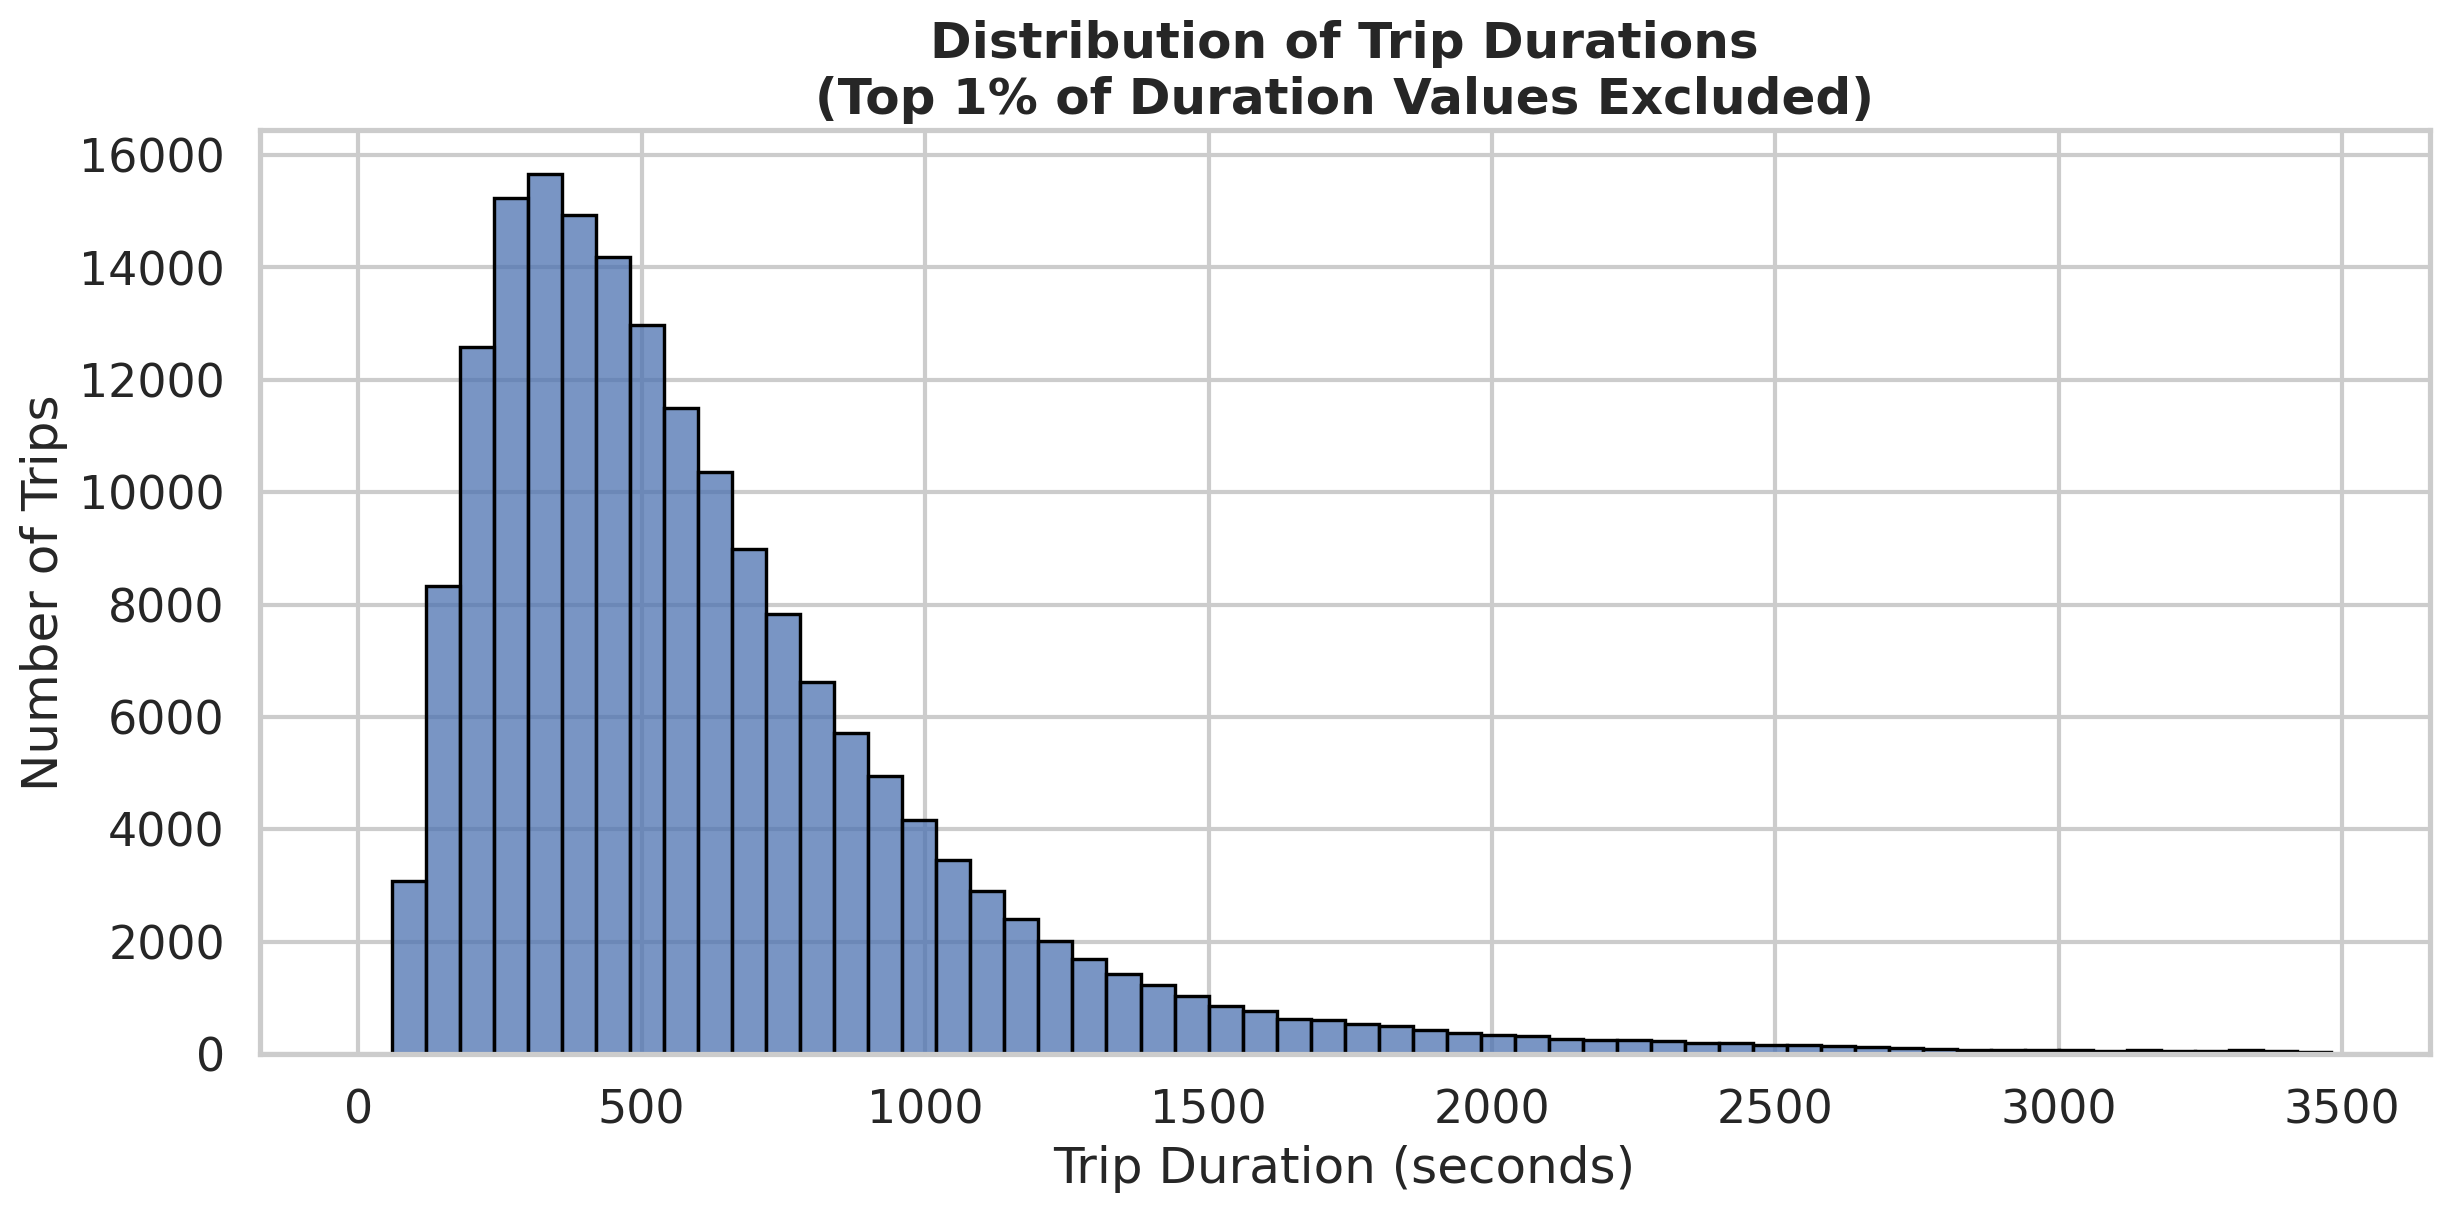

In [4]:
# Plot histogram of trip duration (top 1% excluded)
cutoff = df['duration_sec'].quantile(0.99)
plt.figure(figsize=(14,6))  # Consistent plot size
bins = np.arange(0, cutoff + 60, 60)  # 1-minute bins
sns.histplot(df.loc[df['duration_sec'] <= cutoff, 'duration_sec'], bins=bins, edgecolor='black')

set_labels(
    'Distribution of Trip Durations\n(Top 1% of Duration Values Excluded)',
    'Trip Duration (seconds)',
    'Number of Trips'
)
plt.show()


**Observation:**  
Trip durations are heavily skewed to the right, indicating that most rides are relatively short. The majority of trips appear to be under 1,000 seconds (approximately 17 minutes), with only a few lasting significantly longer.


### 2) User Type

**Question:**  
How are the different user types distributed within the dataset?


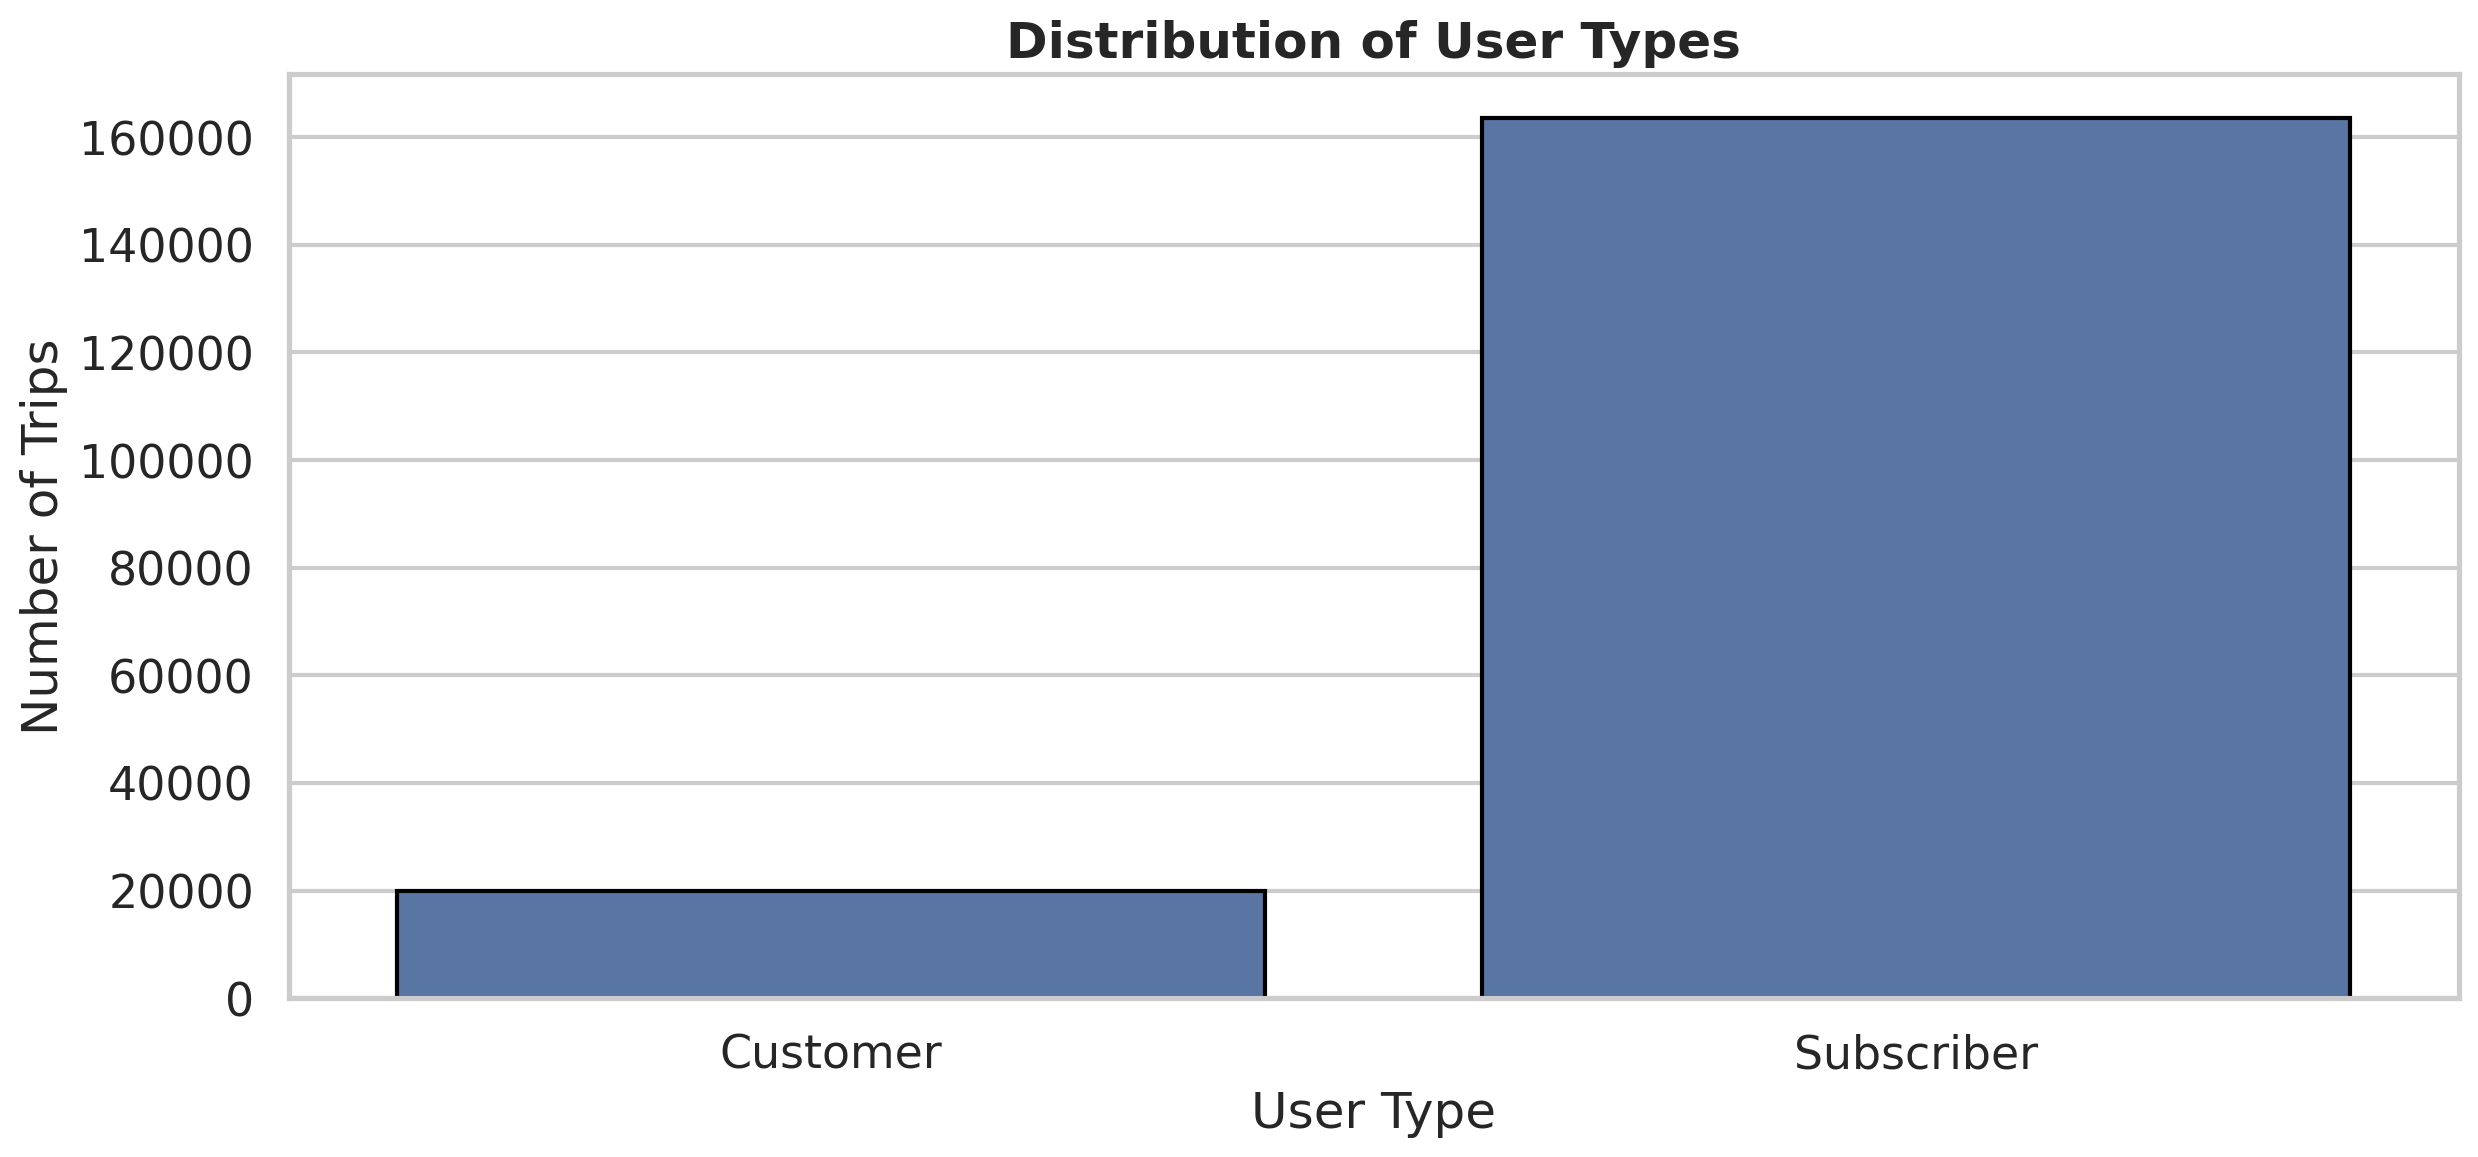

In [5]:
plt.figure(figsize=(14,6))  # Consistent wider size
sns.countplot(x='user_type', data=df, edgecolor='black')

set_labels('Distribution of User Types', 'User Type', 'Number of Trips')
plt.show()


**Observation:**  
The data shows that Subscribers account for the majority of trips, suggesting that most riders are frequent users rather than one-time or casual customers.


### 3) Gender

**Question:**  
How is gender represented among the riders in the dataset?


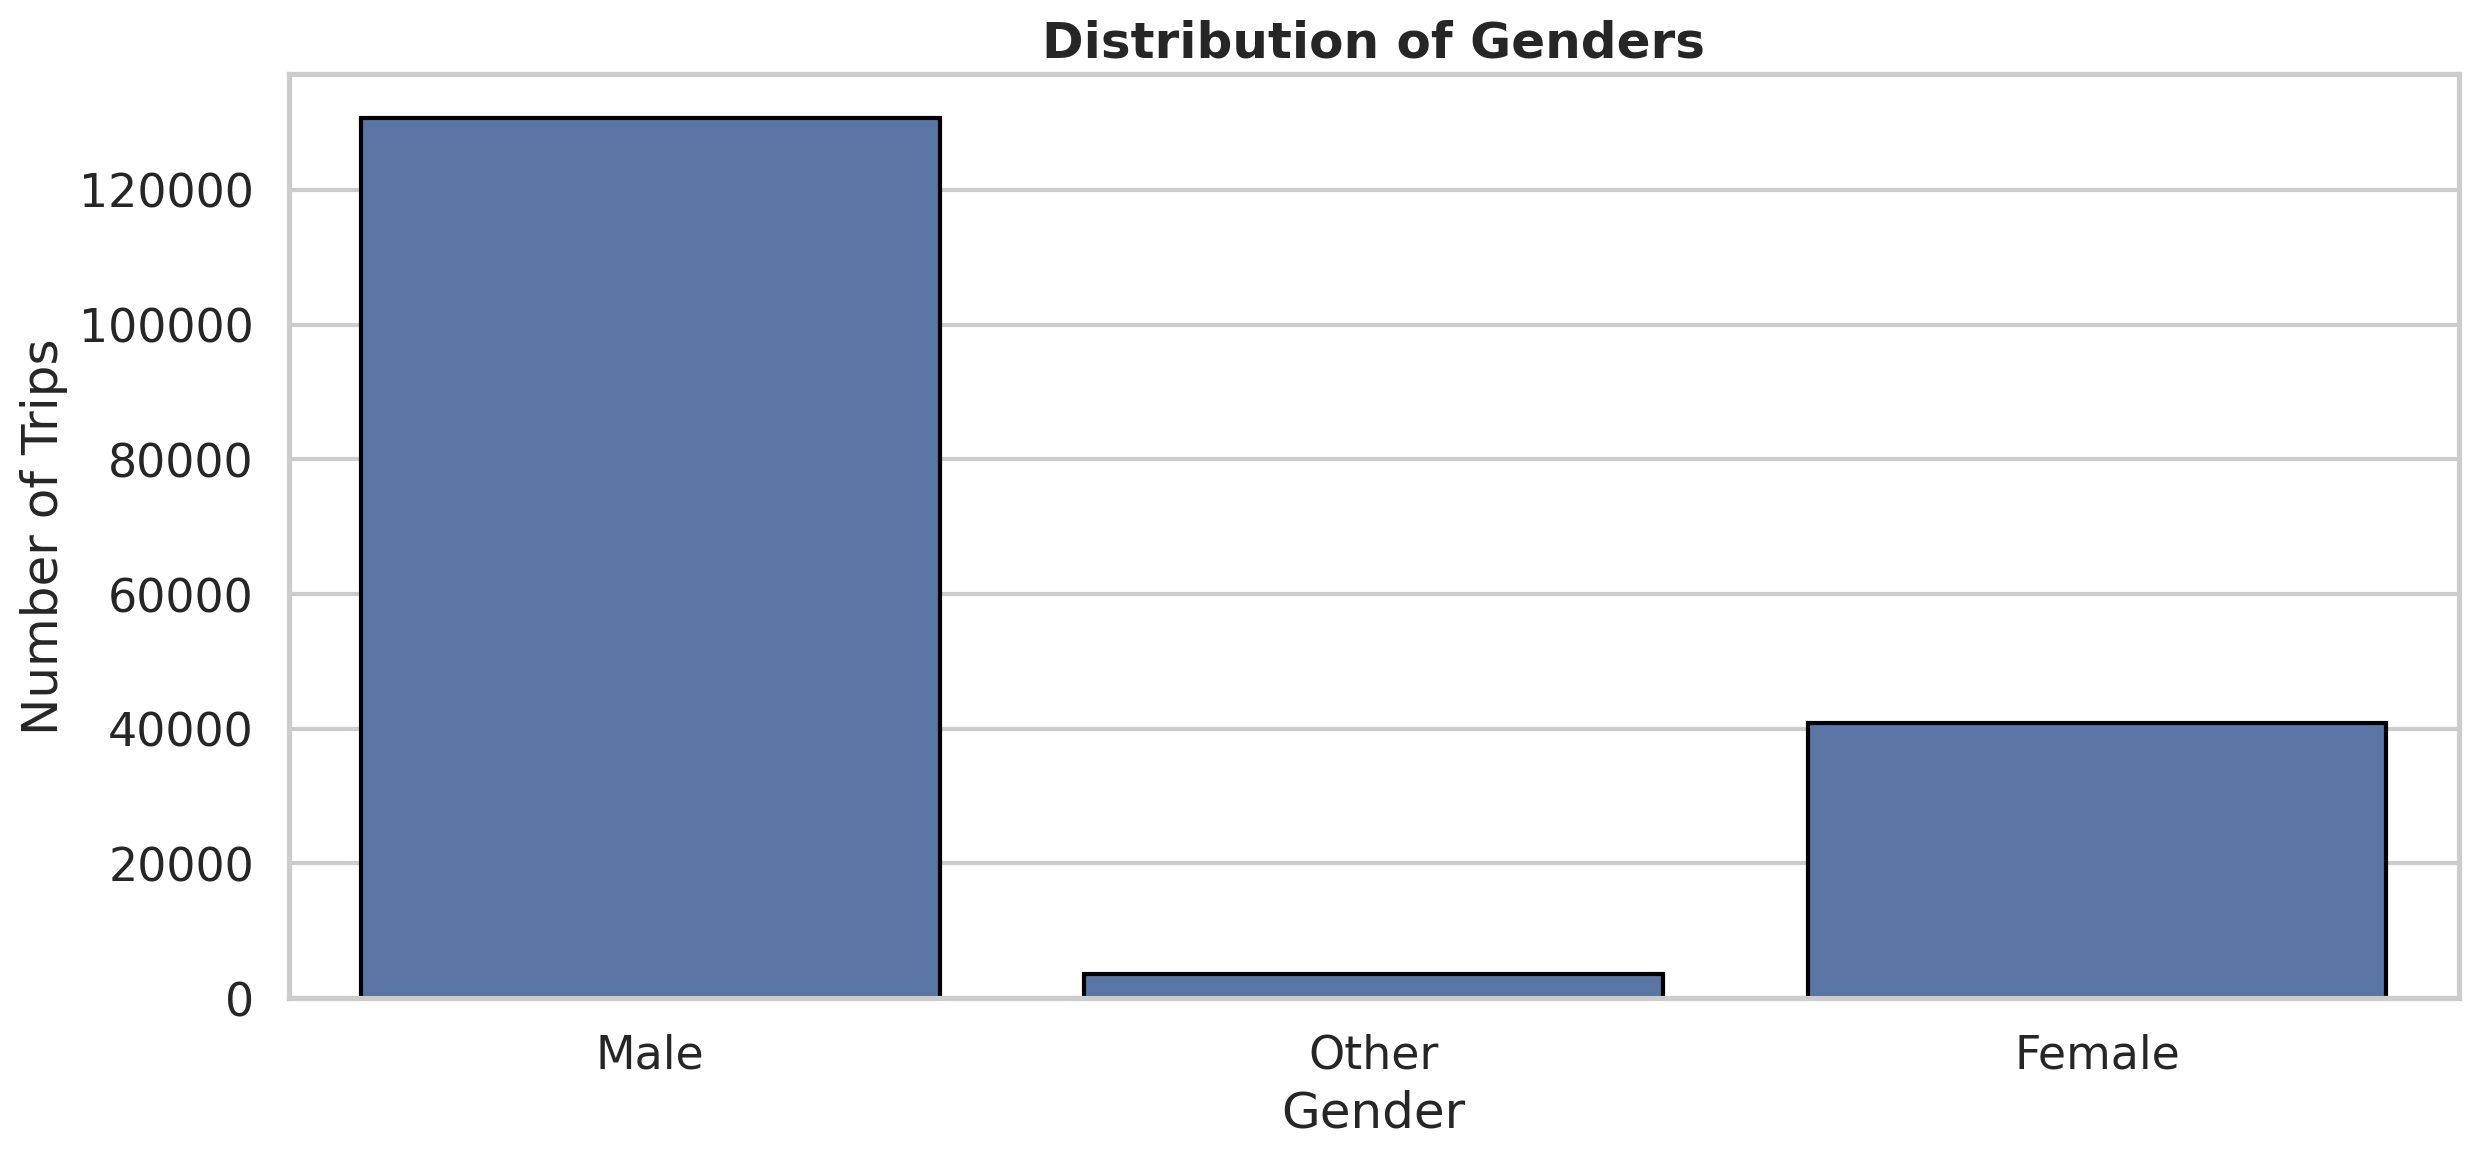

In [6]:
plt.figure(figsize=(14,6))  # Consistent plot size
sns.countplot(x='member_gender', data=df, edgecolor='black')

set_labels('Distribution of Genders', 'Gender', 'Number of Trips')
plt.show()



**Observation:**  
Male riders make up the largest portion of users, followed by female riders. A smaller number of entries are labeled as "Other" or have unspecified gender information.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Trip duration displays a strong right-skew, with most rides being fairly short—typically under 1,000 seconds (around 17 minutes). A small number of trips have very long durations, which may be considered outliers. To enhance the readability of visualizations involving trip duration, I plan to use a logarithmic scale or exclude extreme values when appropriate.

---

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The only noticeably irregular distribution was that of trip duration, largely due to skewness and a few extreme values. At this stage, no data transformations or cleaning steps were applied. However, for upcoming bivariate and multivariate visualizations, I intend to apply log scaling or filter unusually long trips to ensure clearer visual interpretation and avoid misleading trends.


## Bivariate Exploration

In this part of the analysis, I’ll examine how two variables relate to one another. The Question → Visualization → Observation approach will continue to guide the structure for clarity and consistency.

> **Rubric Tip:** This section should include a variety of visualizations: at least one scatter plot, one box plot, and at least one grouped bar chart or heatmap.


### 2) Trip Duration vs. User Type

**Question:**  
How do trip durations differ between Subscribers and Customers?


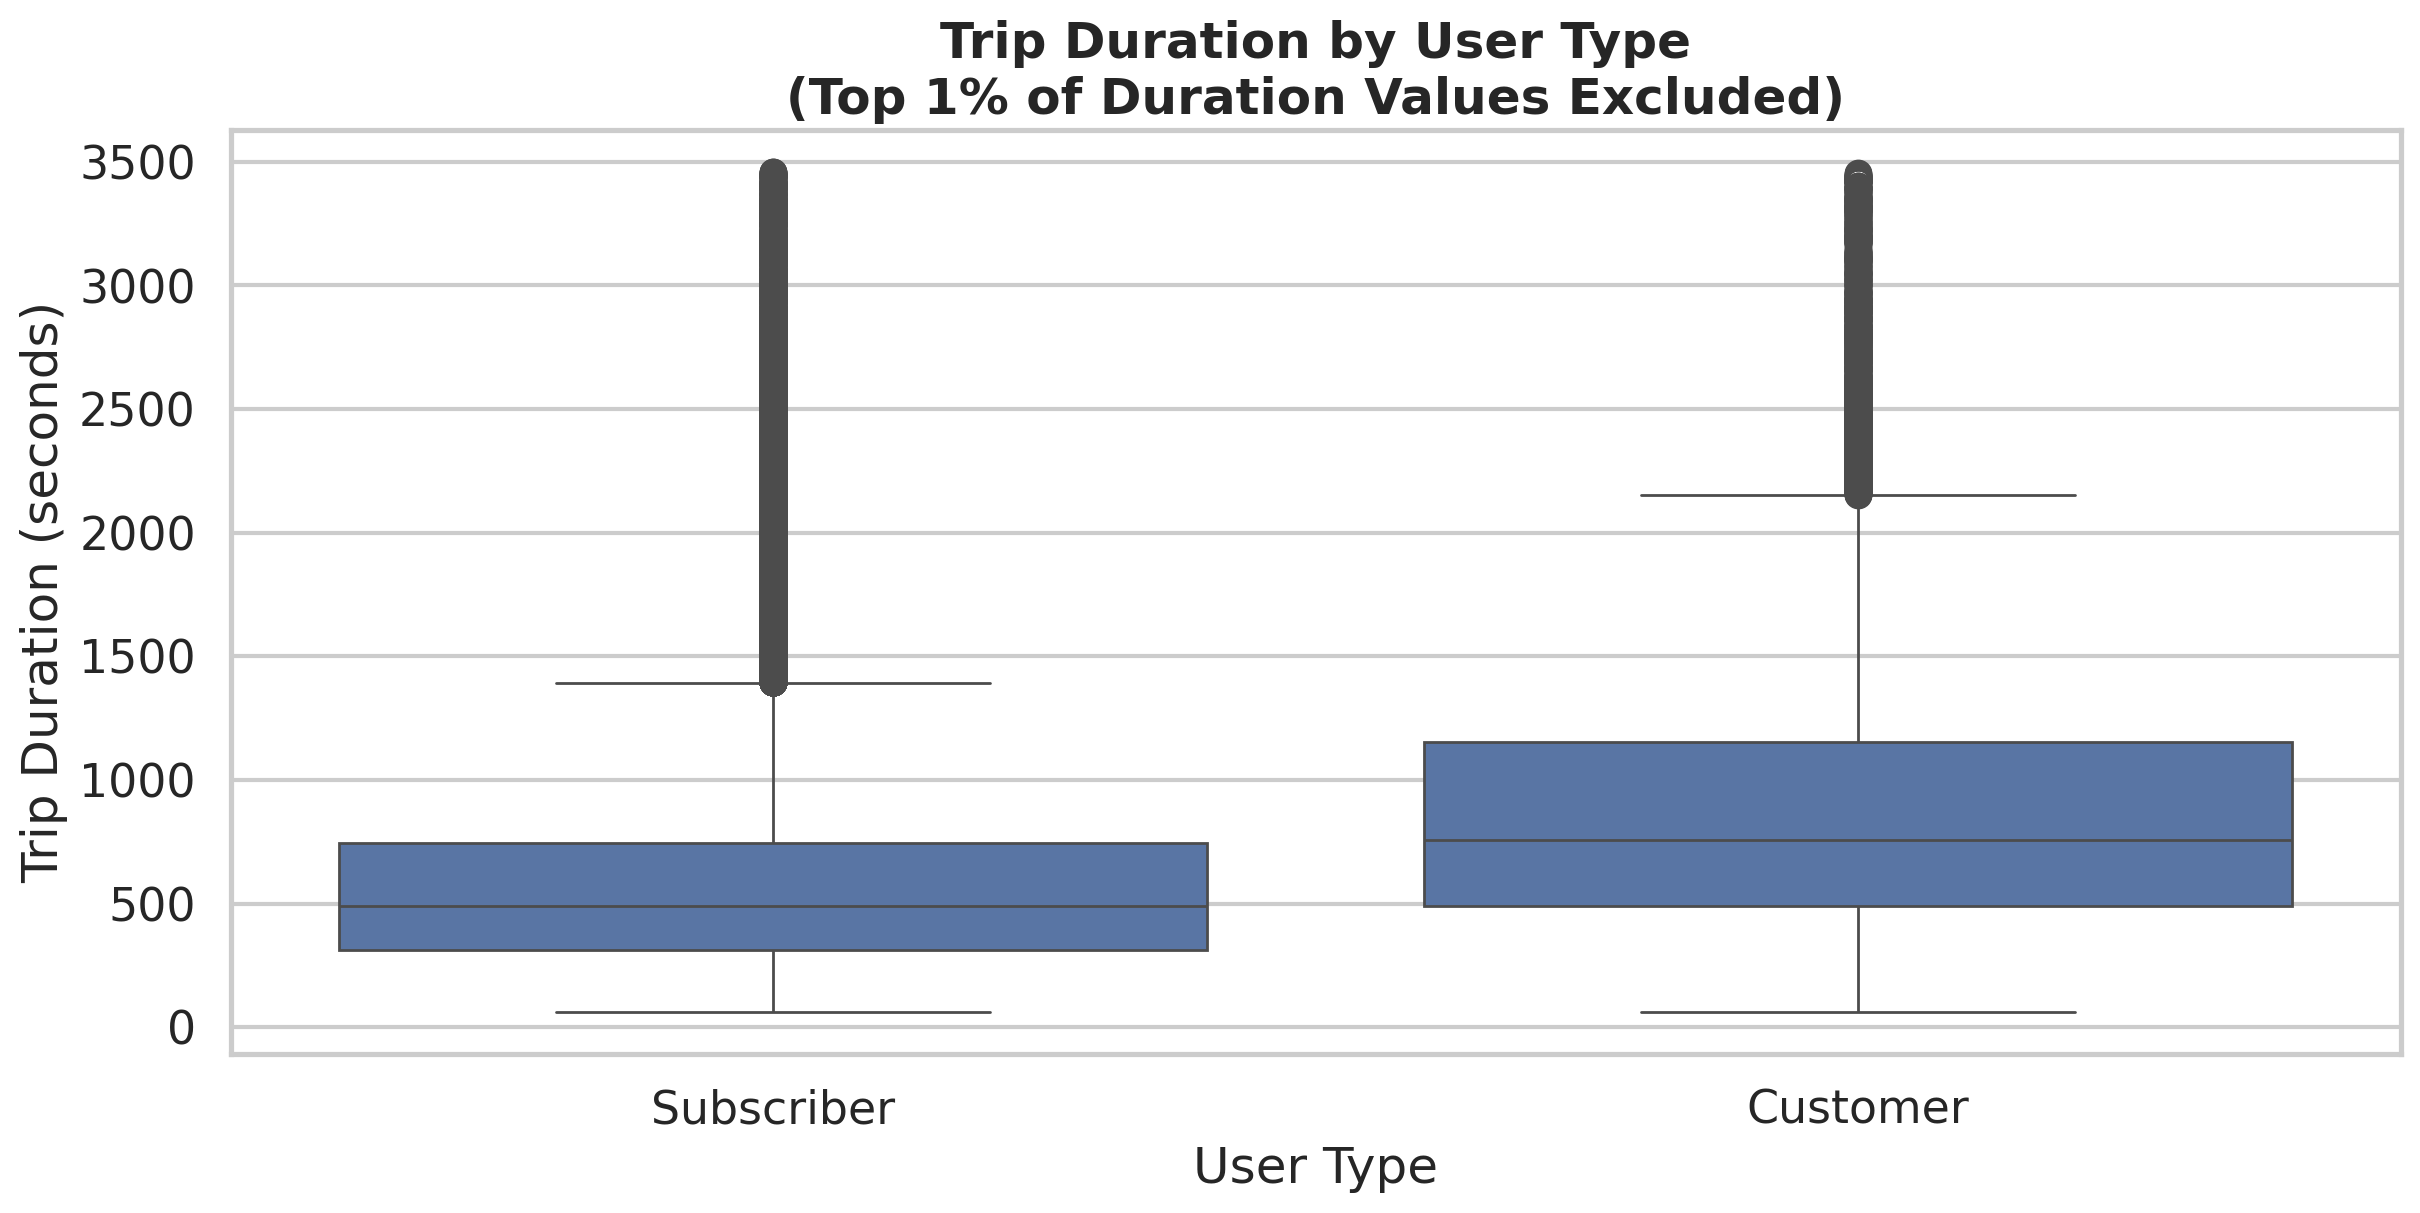

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(x='user_type', y='duration_sec', 
            data=df.query('duration_sec < duration_sec.quantile(0.99)'))

set_labels('Trip Duration by User Type\n(Top 1% of Duration Values Excluded)', 
           'User Type', 
           'Trip Duration (seconds)')
plt.show()


**Observation:**  
Subscribers generally take shorter rides compared to customers. The median trip time for subscribers is lower, while customers tend to have a broader range of trip durations and typically take longer rides.


### 3) Trip Duration vs. Gender

**Question:**  
Does trip duration vary between different gender groups?


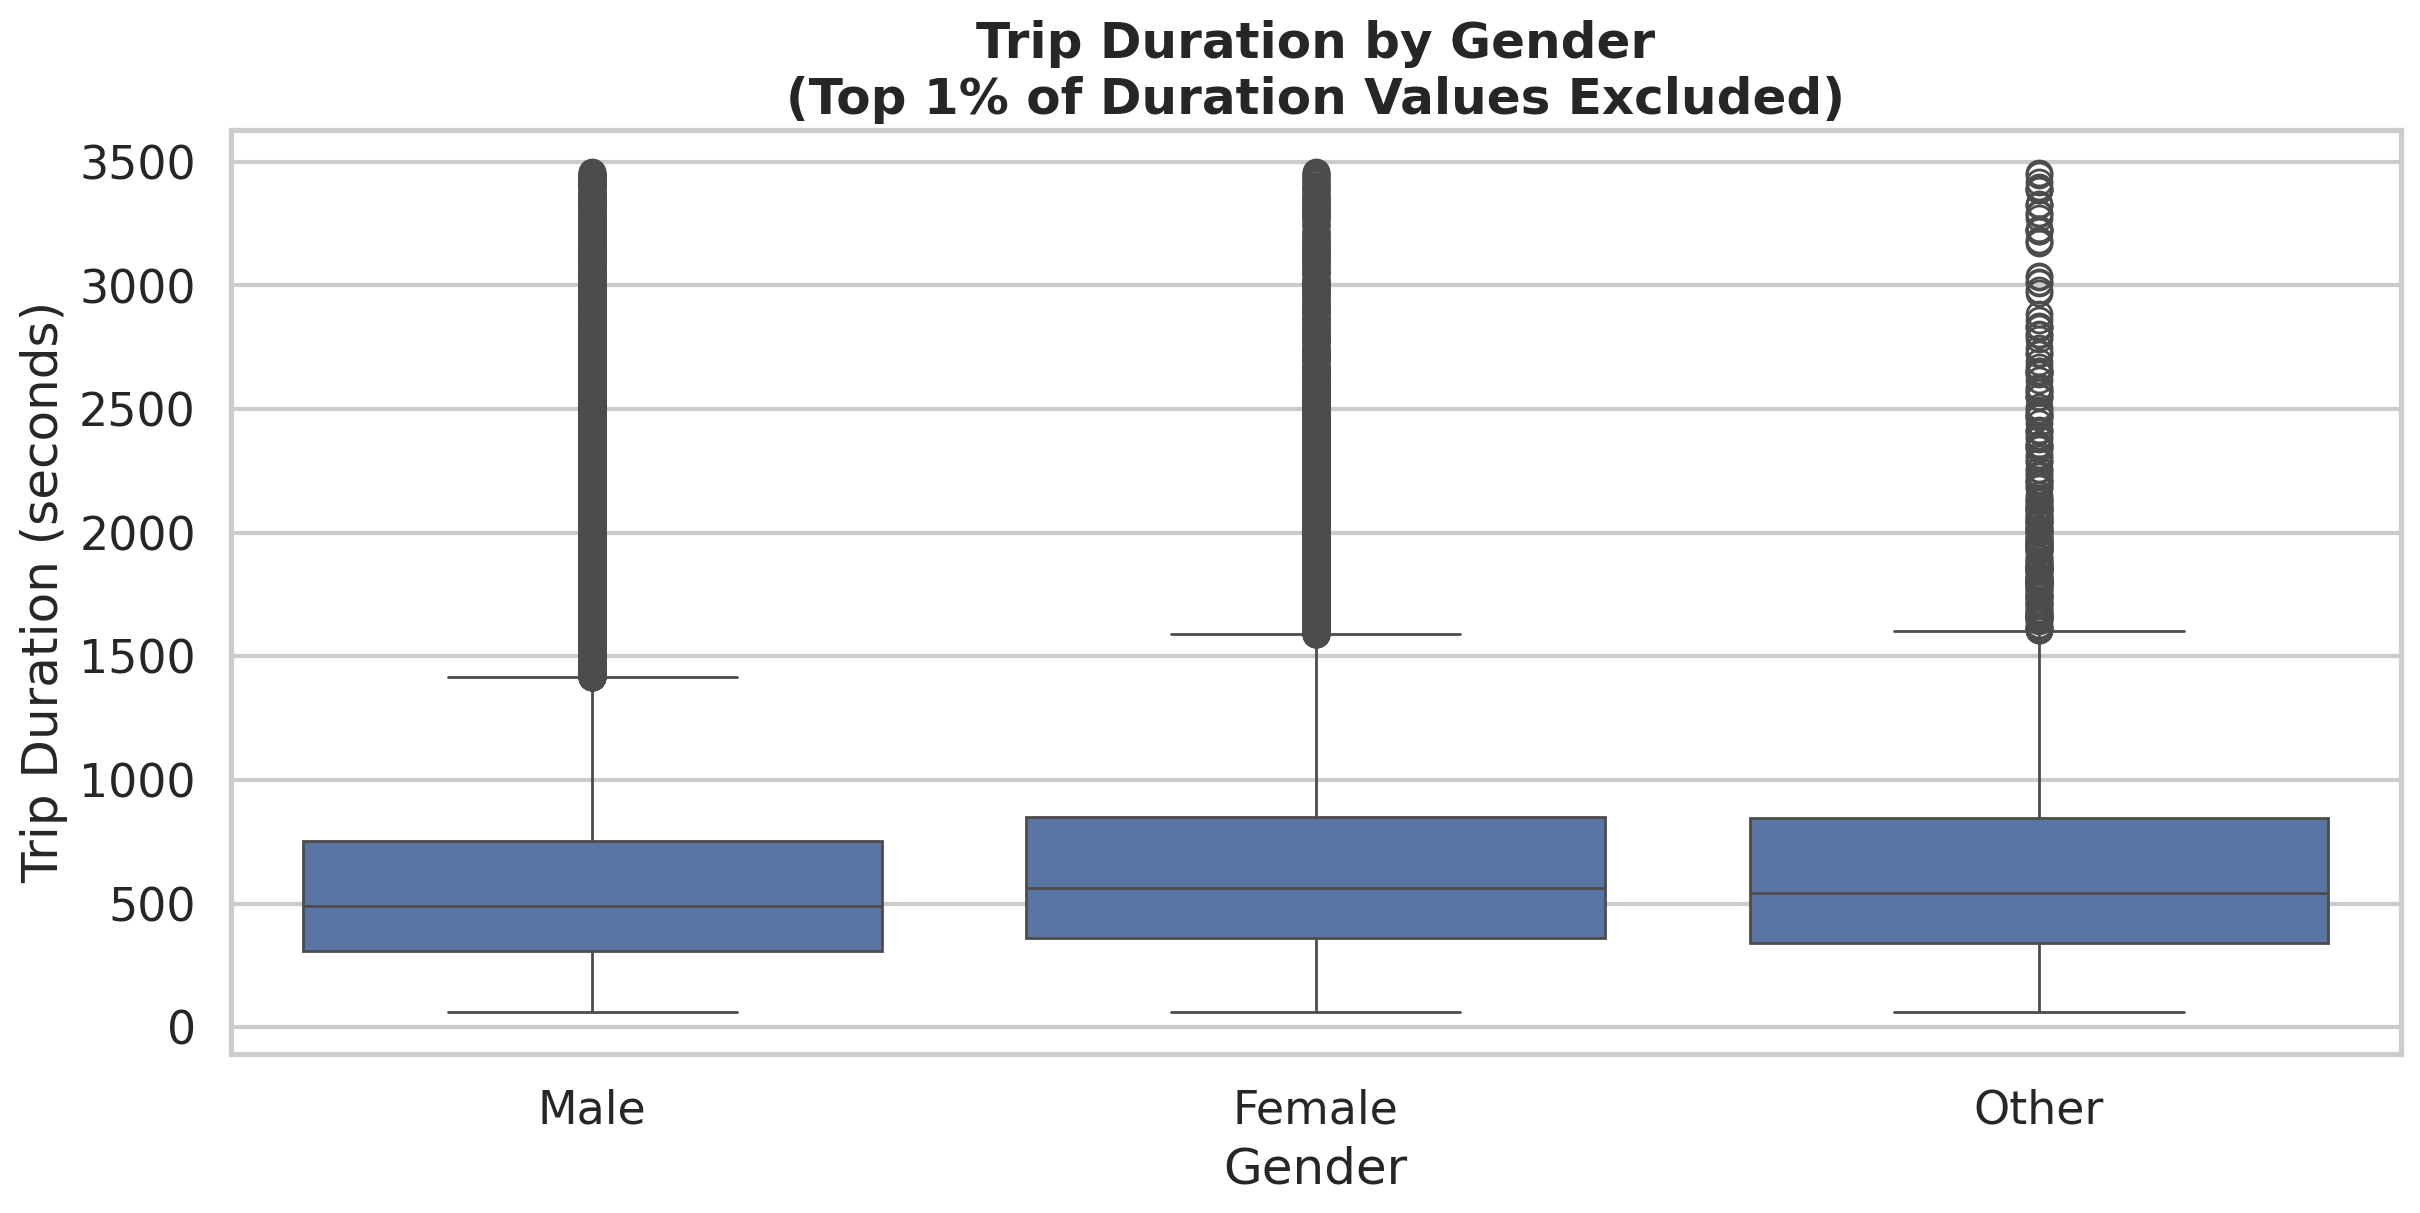

In [8]:
# Box plot of trip duration by gender (top 1% excluded)
plt.figure(figsize=(14,6))
sns.boxplot(x='member_gender', y='duration_sec', 
            data=df.query('duration_sec < duration_sec.quantile(0.99)'))

set_labels(
    'Trip Duration by Gender\n(Top 1% of Duration Values Excluded)',
    'Gender',
    'Trip Duration (seconds)'
)

plt.show()


**Observation:**  
Trip duration patterns appear consistent across gender groups, with similar median values. However, each group includes a few longer rides, contributing to the overall skew in the distribution.


### 4) User Type vs. Day of Week

**Question:**  
How does bike usage differ between Subscribers and Customers throughout the week?


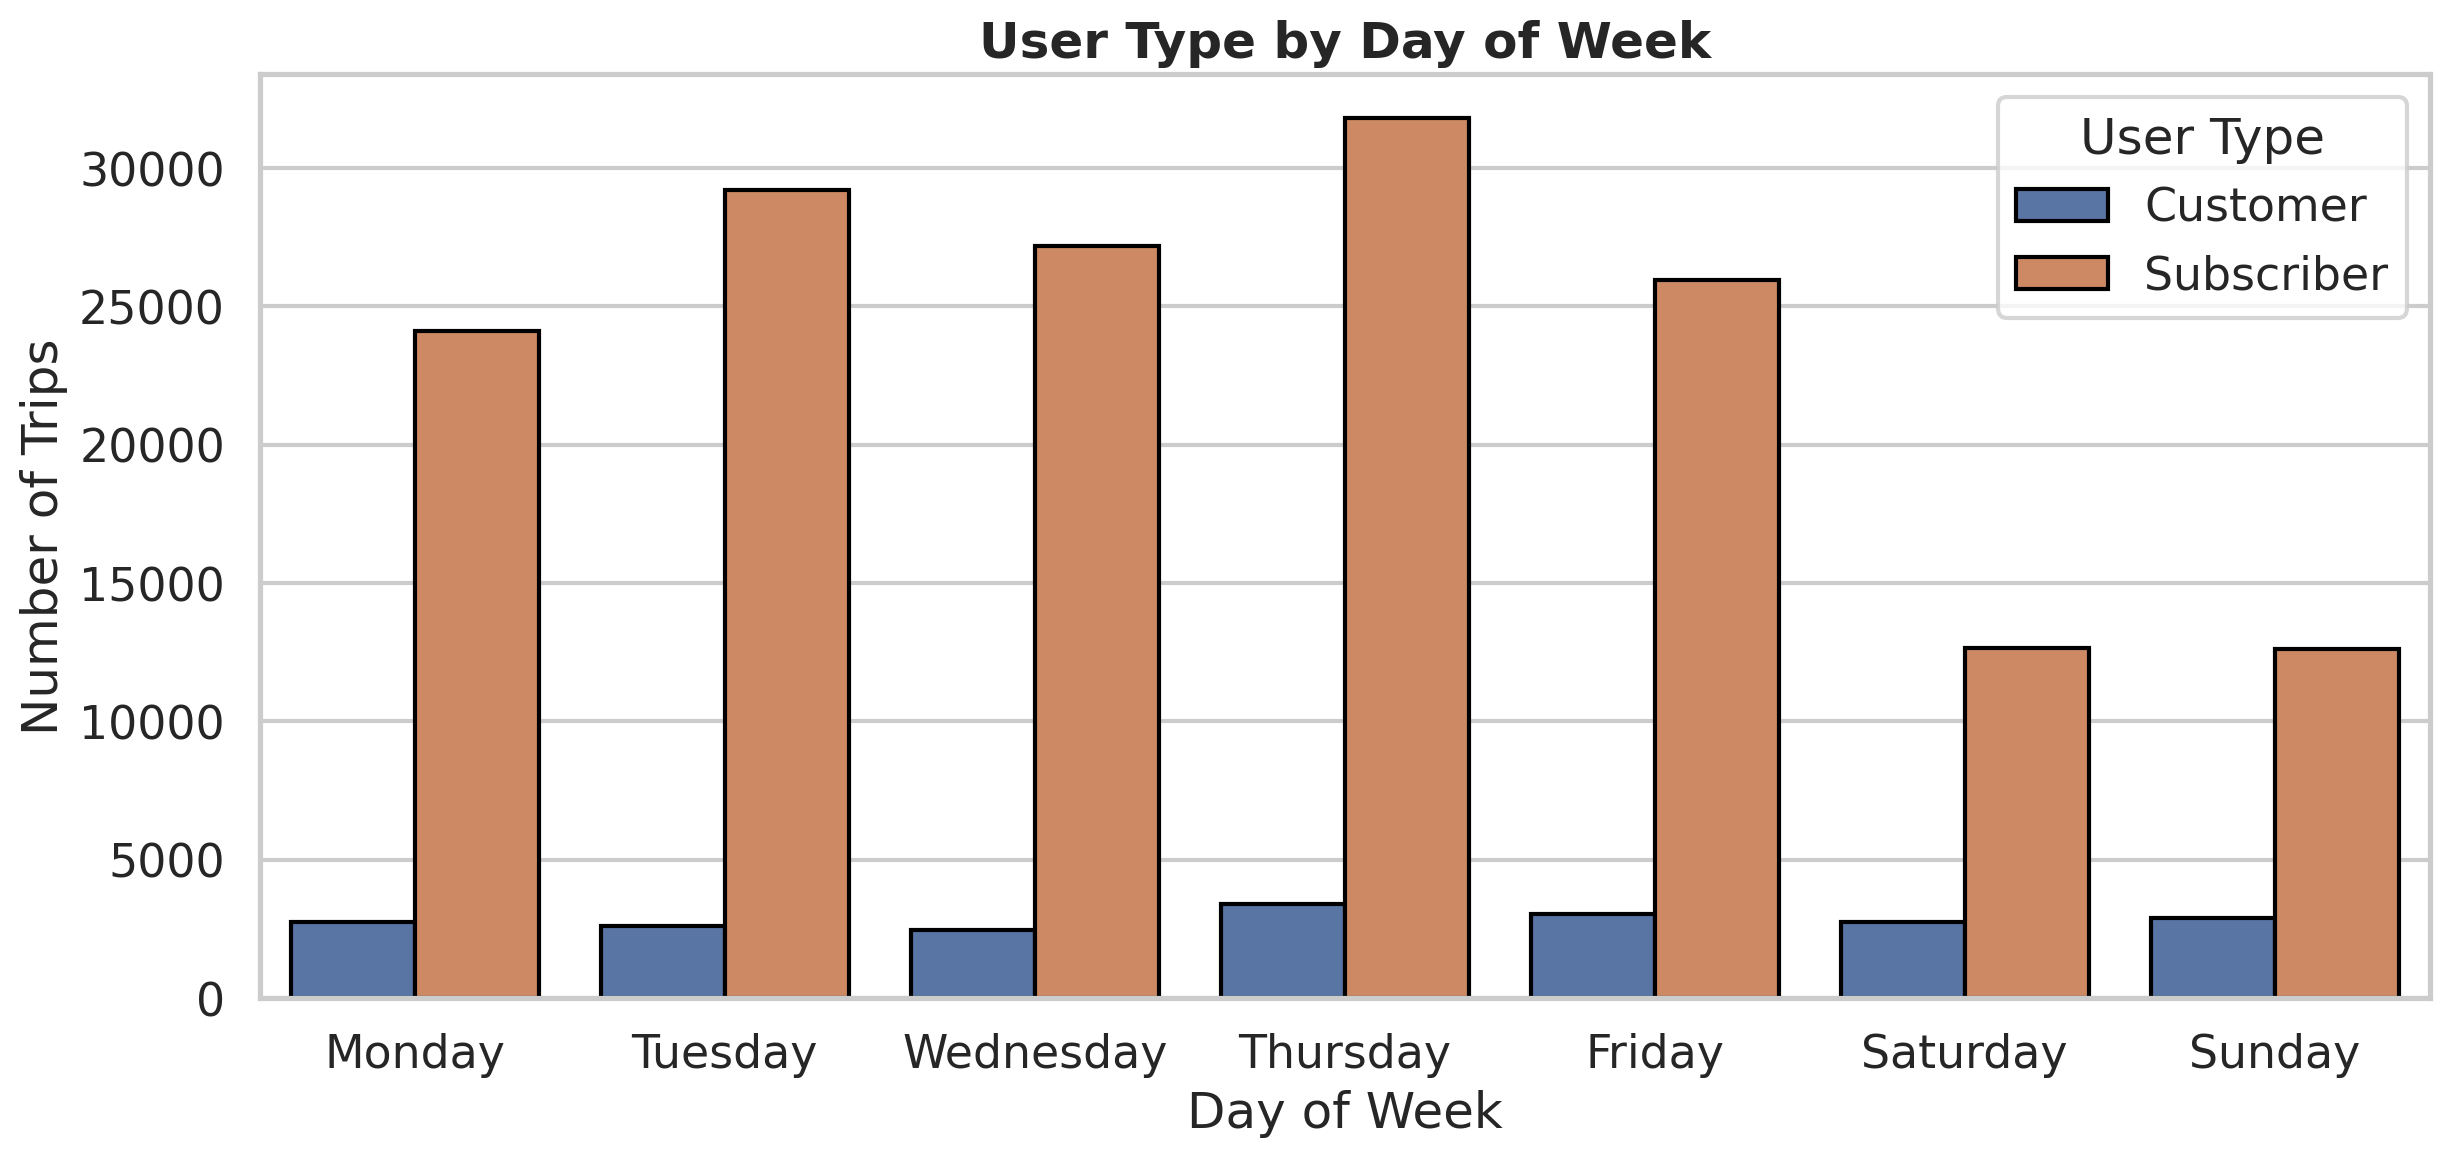

In [9]:
# First create a day_of_week column (if not already created)
df['start_time'] = pd.to_datetime(df['start_time'])
df['day_of_week'] = df['start_time'].dt.day_name()

# Clustered bar chart
plt.figure(figsize=(14,6))  # Consistent plot size
sns.countplot(
    x='day_of_week',
    hue='user_type',
    data=df,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    edgecolor='black'  # Clearer bar edges
)

set_labels(
    'User Type by Day of Week',
    'Day of Week',
    'Number of Trips'
)

plt.legend(title='User Type')
plt.show()


**Observation:**  
Subscribers show higher usage during weekdays, likely reflecting routine commuting patterns. In contrast, customer usage peaks on weekends, suggesting more casual or recreational use.


### 5) Trip Duration vs. Start Hour

**Question:**  
How does the duration of trips vary depending on the hour the ride begins?


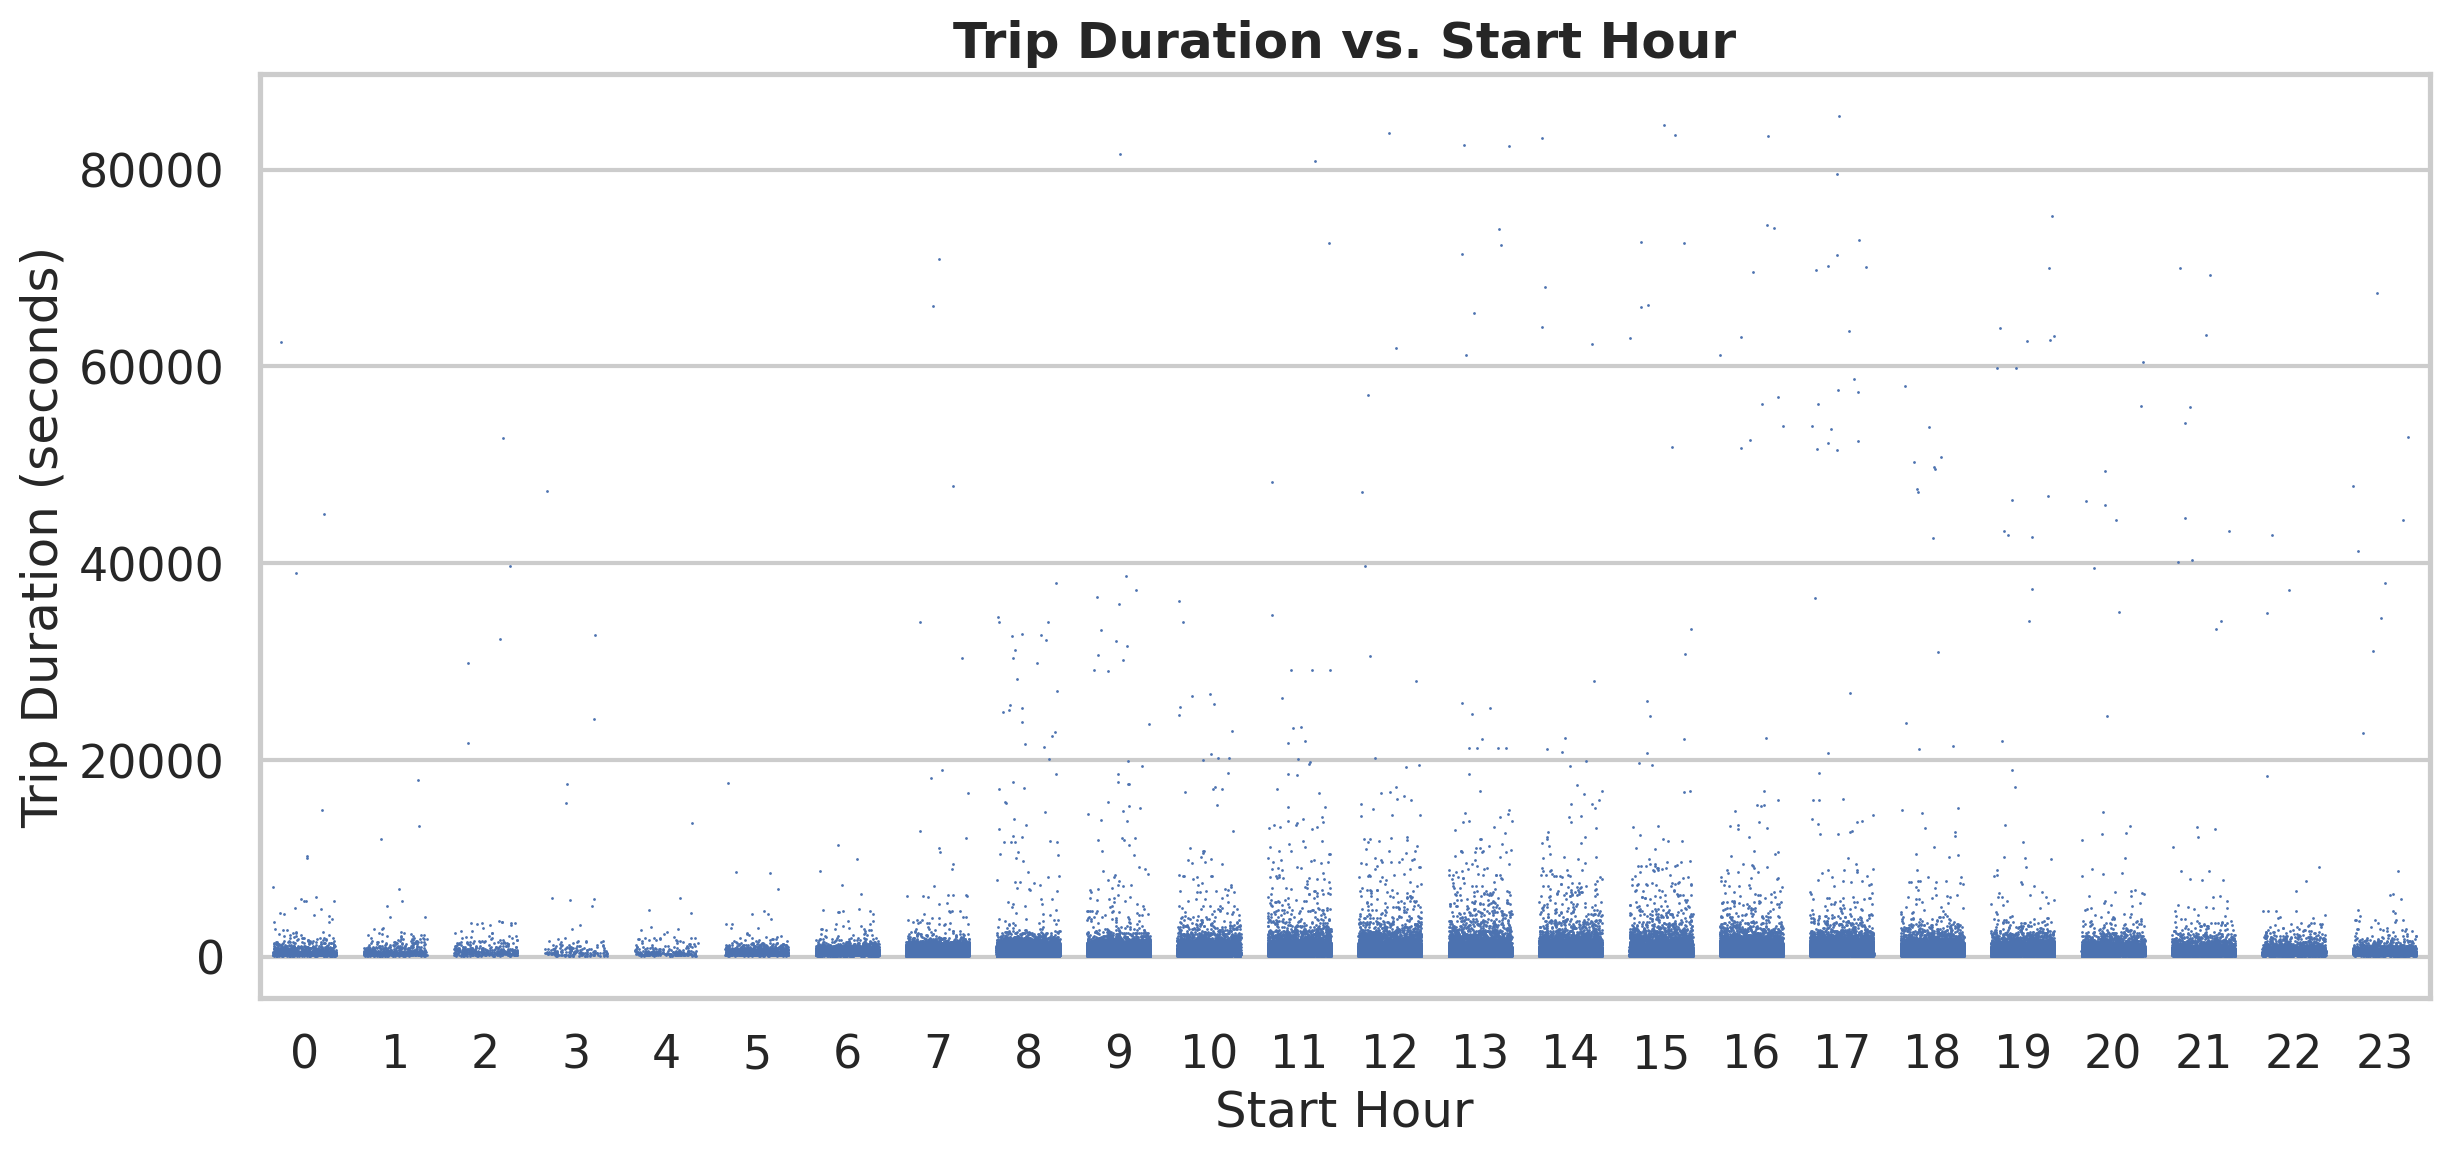

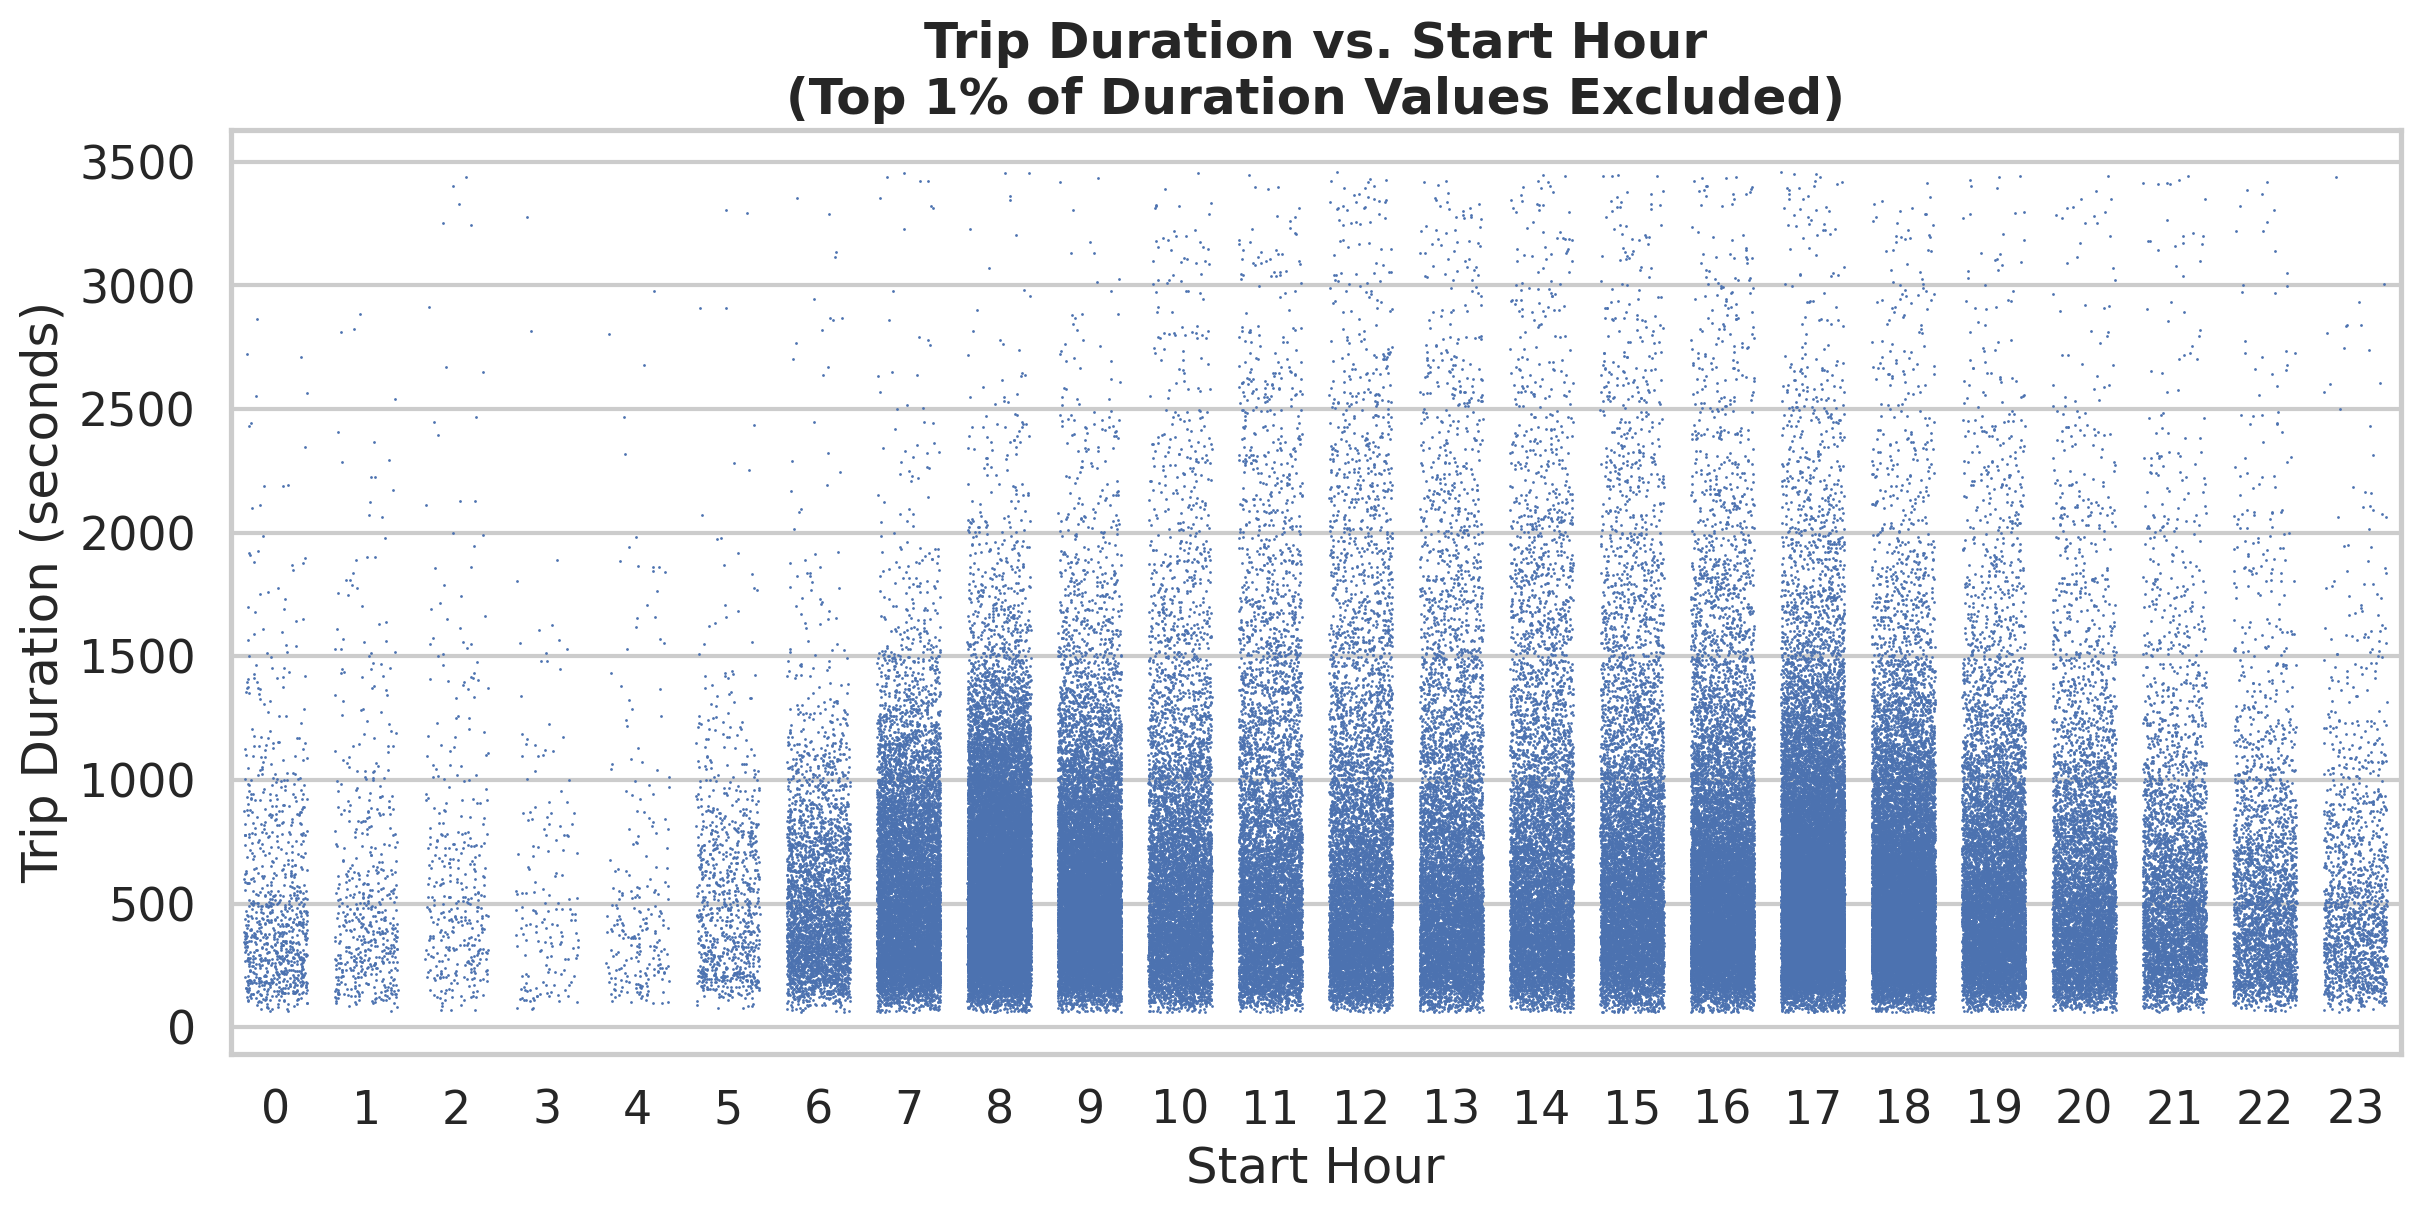

In [10]:
# Create start hour column (if not already created)
df['start_hour'] = df['start_time'].dt.hour

# Strip plot of trip duration vs start hour
plt.figure(figsize=(14,6))  # Consistent wider size
sns.stripplot(x='start_hour', y='duration_sec', data=df, size=1, jitter=0.35)

set_labels(
    'Trip Duration vs. Start Hour',
    'Start Hour',
    'Trip Duration (seconds)'
)

plt.show()

# Outlier-excluded version
plt.figure(figsize=(14,6))
sns.stripplot(x='start_hour', y='duration_sec', 
              data=df.query('duration_sec < duration_sec.quantile(0.99)'), 
              size=1, jitter=0.35)

set_labels(
    'Trip Duration vs. Start Hour\n(Top 1% of Duration Values Excluded)',
    'Start Hour',
    'Trip Duration (seconds)'
)

plt.show()


**Observation:**  
There isn’t a strong pattern linking trip duration to start hour. While longer outlier trips occur throughout the day, the majority of rides remain relatively short regardless of start time.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Trip duration—the primary focus—varied noticeably between user groups. Customers tended to have longer rides than subscribers, which was evident in the box plot. This difference suggests that customers are more likely using the service for recreational or occasional purposes, while subscribers are likely making shorter, routine trips—possibly for commuting.

When comparing trip durations across gender groups, median values were relatively close. However, all gender categories showed right-skewed distributions with a few notably long trips. As for start hour, trip duration didn’t show a strong relationship; most rides were short regardless of when they started, though long outliers were present at all hours.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, the relationship between user type and day of the week stood out. Subscribers showed higher activity on weekdays, consistent with daily commuting habits. On the other hand, customer usage increased on weekends, which aligns with more casual or leisure-oriented riding behavior. This highlights a clear temporal distinction between how each user group engages with the service.

## Multivariate Exploration

> In this section, I will investigate relationships between three or more variables at a time to uncover deeper insights. I will continue to follow the Question → Visualization → Observation framework.


### 1) Trip Duration by User Type and Gender (Facet Plot)

**Question:**  
How do trip duration patterns vary across different user types and genders?


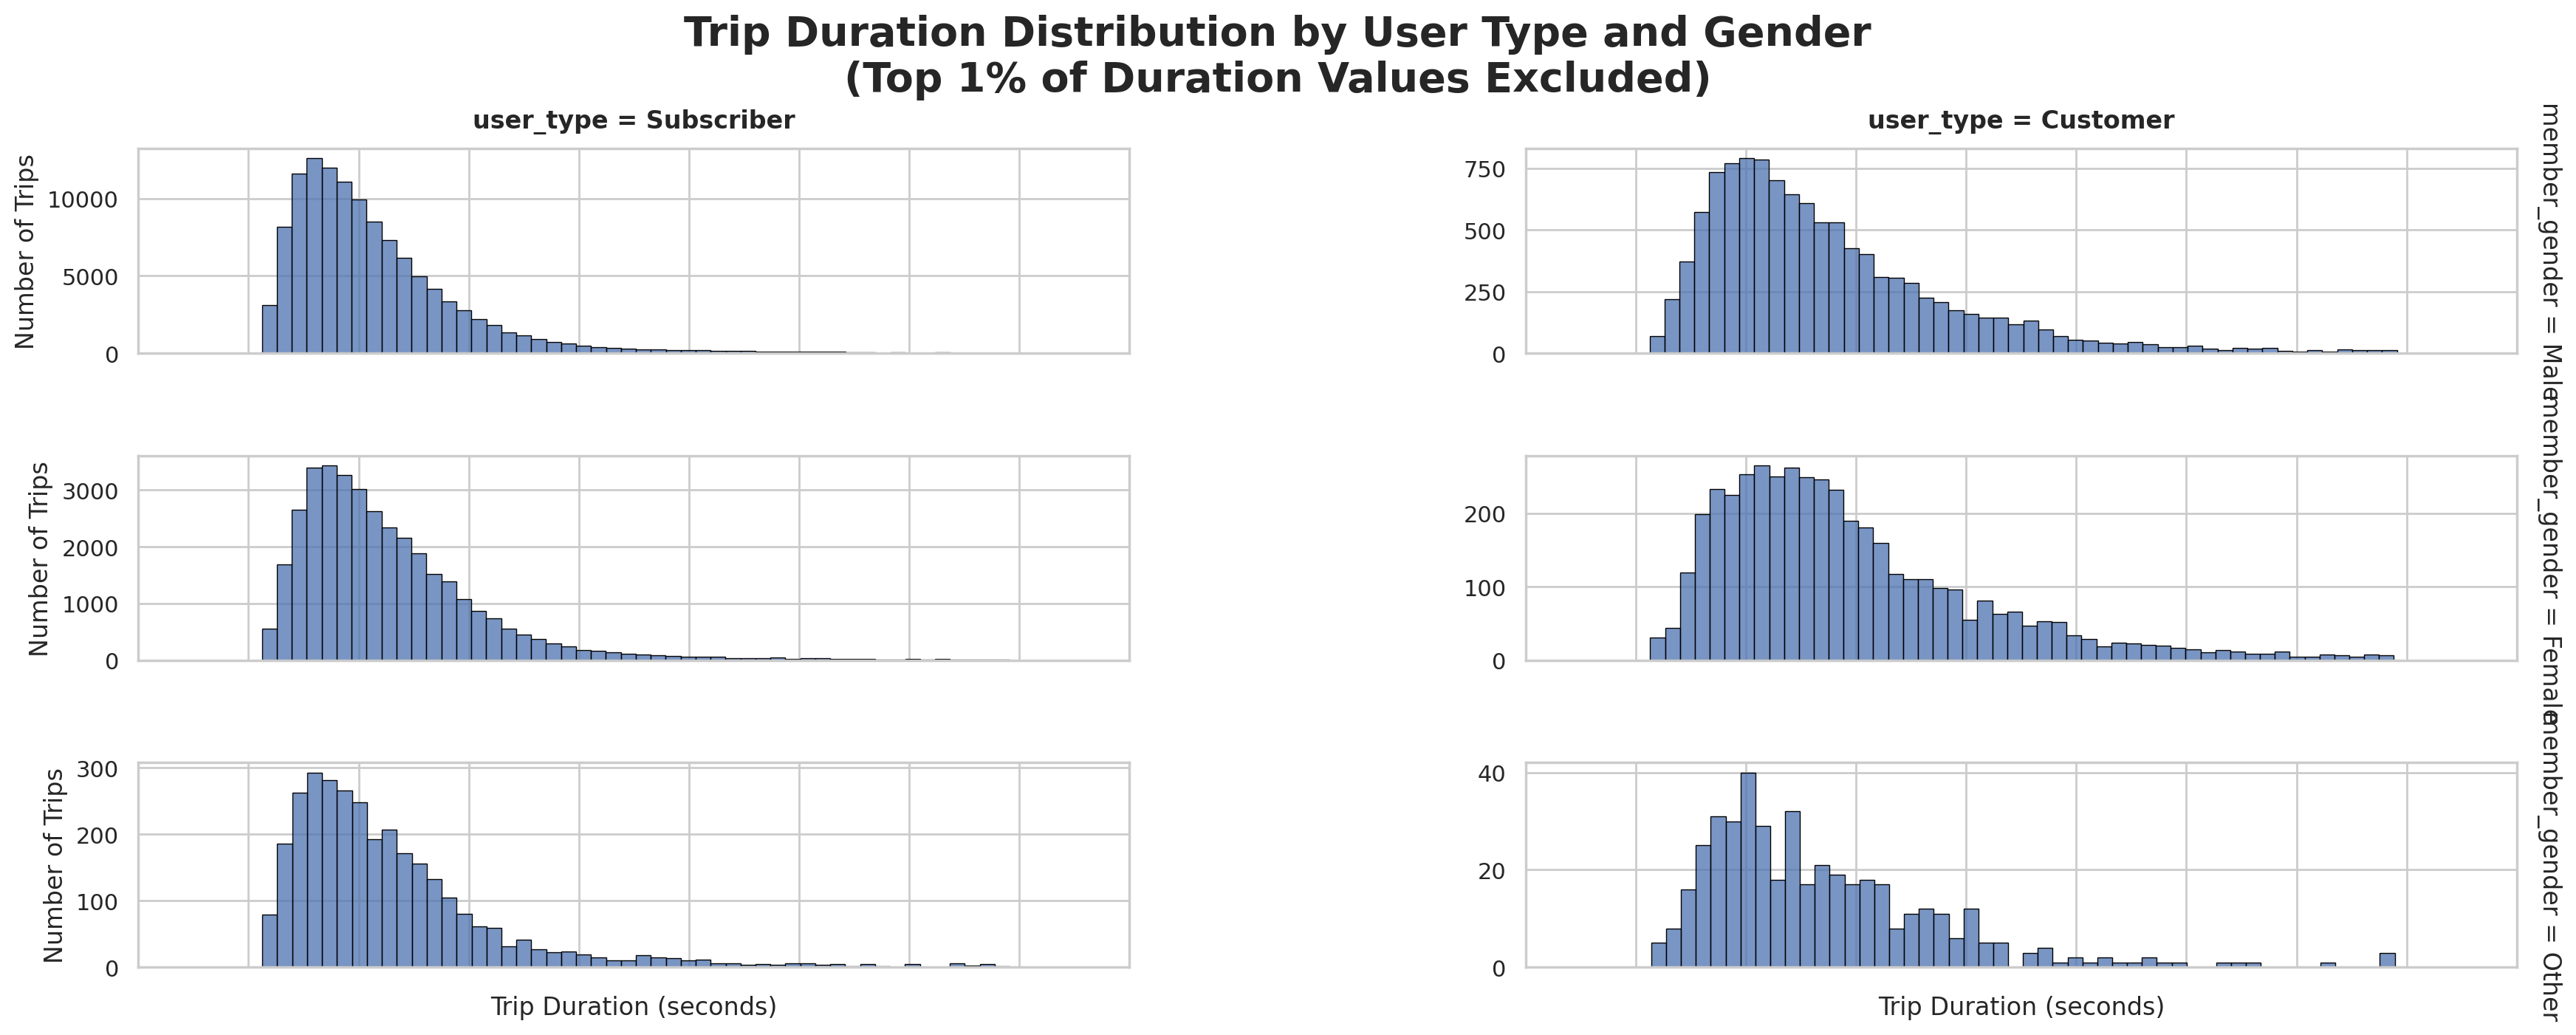

In [11]:
# Facet plot: histograms of trip duration by user type and gender (Top 1% excluded)
sns.set_theme(style="whitegrid")  # Clean look

g = sns.FacetGrid(
    df.query('duration_sec < duration_sec.quantile(0.99)'), 
    col='user_type',
    row='member_gender',
    margin_titles=True,
    height=4,
    aspect=1.8,
    sharey=False,
    despine=False
)

g.map_dataframe(
    sns.histplot, 
    x='duration_sec', 
    bins=50, 
    edgecolor='black', 
    color='#4c72b0', 
    linewidth=0.5
)

# Set axis labels with more spacing
g.set_axis_labels("Trip Duration (seconds)", "Number of Trips")

# Improve facet titles (larger, bold)
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=12, fontweight='bold', pad=10)  # pad = extra space below title

# Adjust layout for more spacing
g.fig.set_size_inches(18, 7)
g.fig.subplots_adjust(top=0.85, hspace=0.5, wspace=0.4)

# Main title with good positioning
g.fig.suptitle(
    'Trip Duration Distribution by User Type and Gender\n(Top 1% of Duration Values Excluded)',
    fontsize=20,
    fontweight='bold'
)

# Rotate x-ticks for better visibility
g.set_xticklabels(rotation=30)

plt.show()


**Observation:**  
Across all gender groups, subscribers typically take shorter trips, while customers are more likely to take longer rides. Although most trips for every group are under 1,000 seconds, the distribution for customers shows a longer tail, indicating more extended trips.


### 2) Start Hour vs. Trip Duration by User Type (Scatter Plot with Color Encoding)

**Question:**  
How is trip duration influenced by the hour of day a ride starts, and how does this relationship differ between user types?


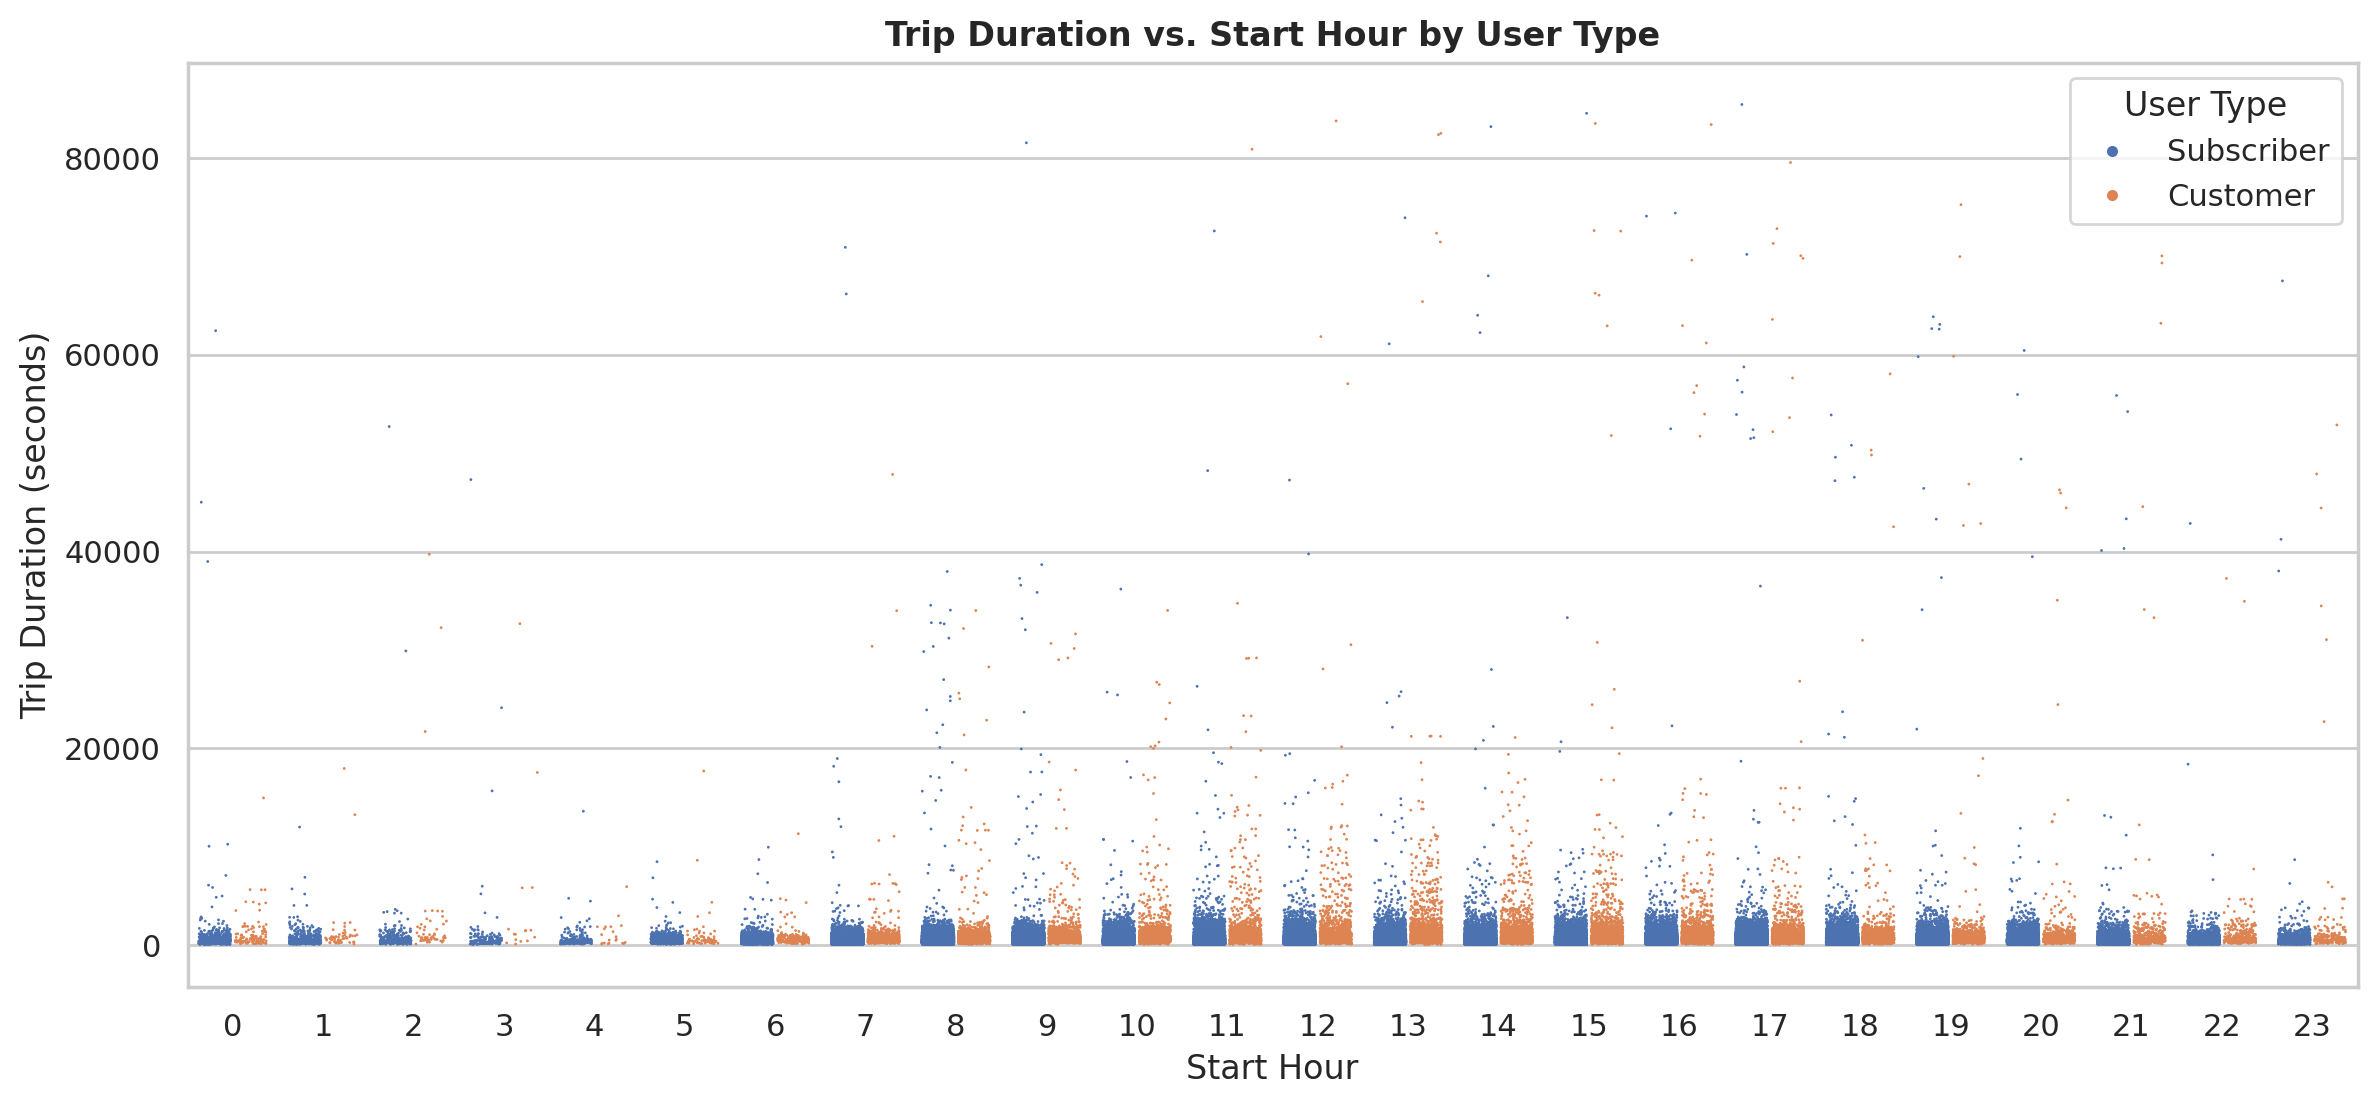

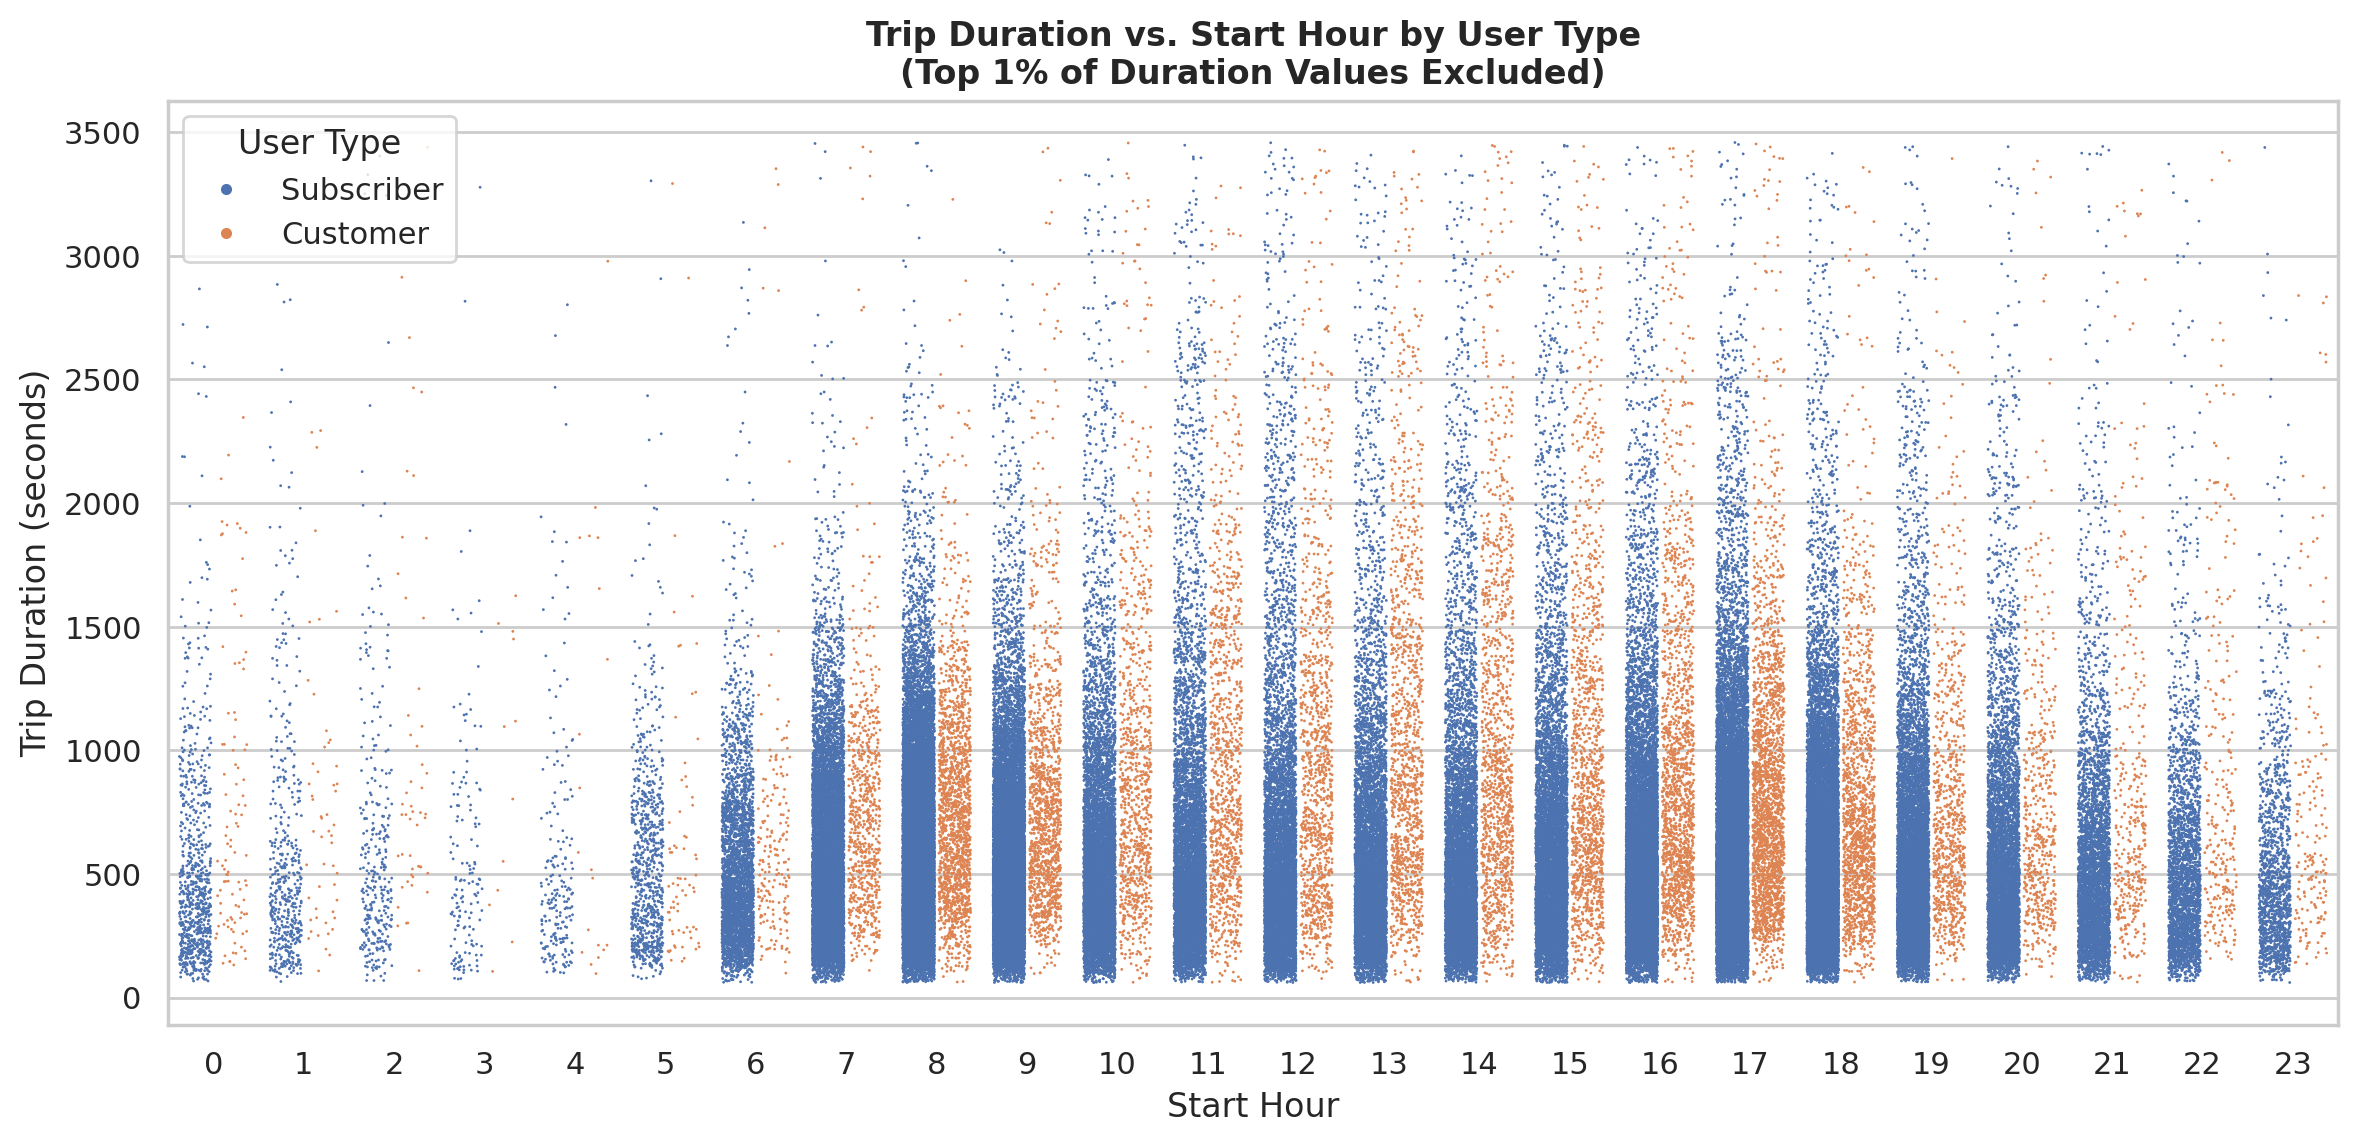

In [12]:
# Strip plot with color encoding for user type
plt.figure(figsize=(14,6))  # Consistent wider size
sns.stripplot(
    x='start_hour',
    y='duration_sec',
    hue='user_type',
    data=df,
    size=1,
    jitter=0.35,
    dodge=True
)

set_labels(
    'Trip Duration vs. Start Hour by User Type',
    'Start Hour',
    'Trip Duration (seconds)'
)

plt.legend(title='User Type', markerscale=4)
plt.show()

# Outlier-excluded version for cleaner view
plt.figure(figsize=(14,6))
sns.stripplot(
    x='start_hour',
    y='duration_sec',
    hue='user_type',
    data=df.query('duration_sec < duration_sec.quantile(0.99)'),
    size=1,
    jitter=0.35,
    dodge=True
)

set_labels(
    'Trip Duration vs. Start Hour by User Type\n(Top 1% of Duration Values Excluded)',
    'Start Hour',
    'Trip Duration (seconds)'
)

plt.legend(title='User Type', markerscale=4)
plt.show()


**Observation:**  
For both user groups, the majority of rides are brief regardless of start hour. However, longer trips are more commonly associated with customers and are spread throughout the day, whereas subscriber trips are more concentrated around shorter durations.


### 3) Trip Duration and Start Hour by User Type (Pairwise Plot)

**Question:**  
What patterns emerge in the joint distribution of trip duration and start hour when separated by user type? Do these variables interact differently across user groups?


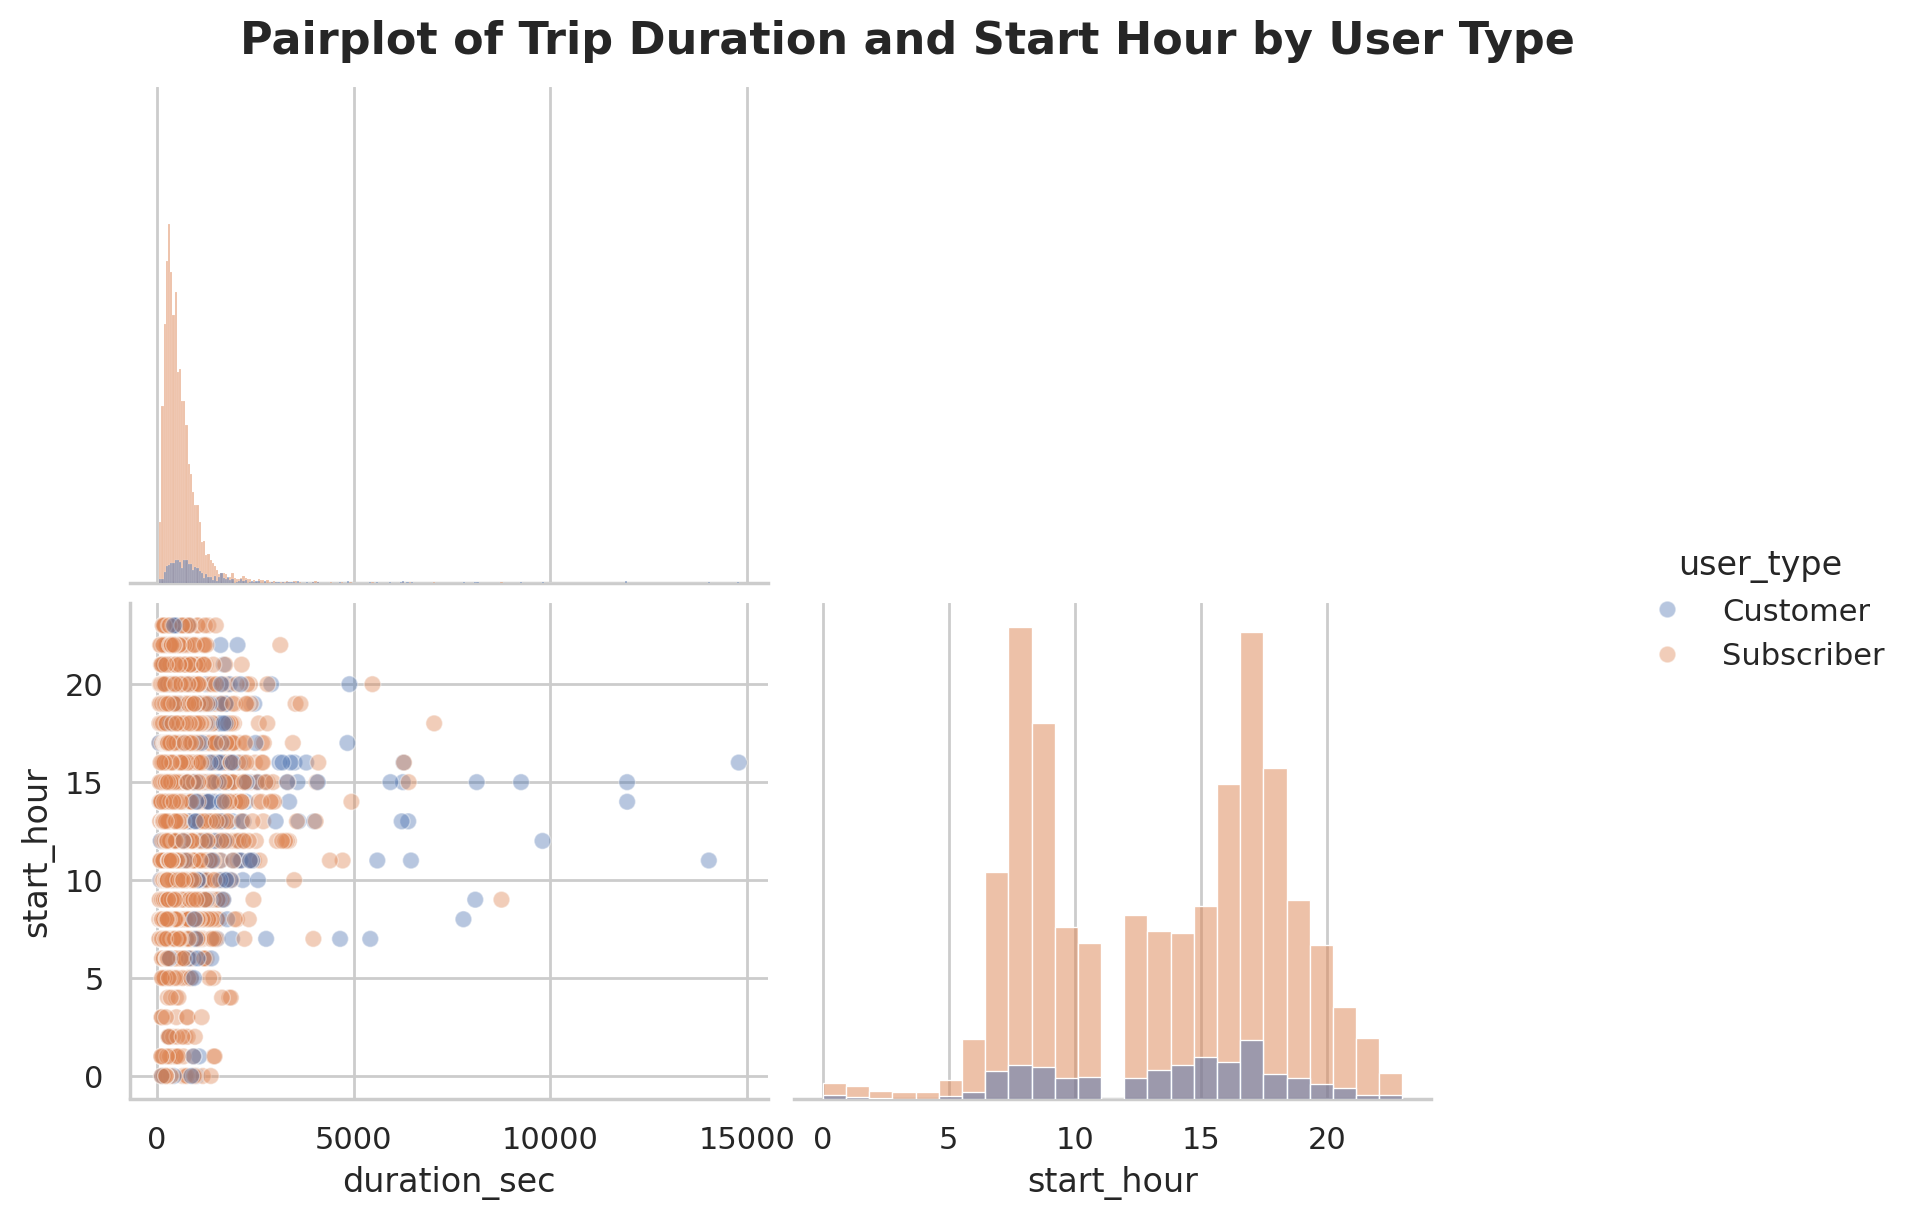

In [13]:
# Plot matrix example using pairplot (downsample for performance)
sample_df = df.sample(5000, random_state=1)

# Create the pairplot
pair_grid = sns.pairplot(
    sample_df,
    vars=['duration_sec', 'start_hour'],
    hue='user_type',
    plot_kws={'alpha': 0.4, 'edgecolor': 'w', 'linewidth': 0.5},  # clearer points
    diag_kind='hist',  # clearer diagonal
    corner=True  # remove redundant upper plots for cleaner look
)

# Set figure size (pairplot uses its own fig object)
pair_grid.fig.set_size_inches(10, 6)

# Add title
pair_grid.fig.suptitle(
    'Pairplot of Trip Duration and Start Hour by User Type',
    fontsize=16,
    weight='bold',
    y=1.03
)

plt.show()


**Observation:**  
The pairplot reveals that subscribers primarily start their trips during two key time windows—around 8 AM and 5 PM—aligning with common commuting hours. This reinforces the notion that subscribers mainly use the service for daily travel to and from work.

In contrast, customers show a more even distribution of start times throughout the day, suggesting less structured or more recreational use. While both groups tend to take shorter trips overall, customers exhibit a wider spread, with more frequent long-duration rides. The scatter plots confirm that extended trips occur at various hours, but they are predominantly associated with customer activity.


### 4) Average Trip Duration by Start Hour and User Type

This heatmap explores how the average trip duration changes throughout the day for each user type (Subscriber vs. Customer). It provides a clear visual comparison of temporal usage patterns, helping to distinguish between the riding behaviors of casual users and regular commuters.


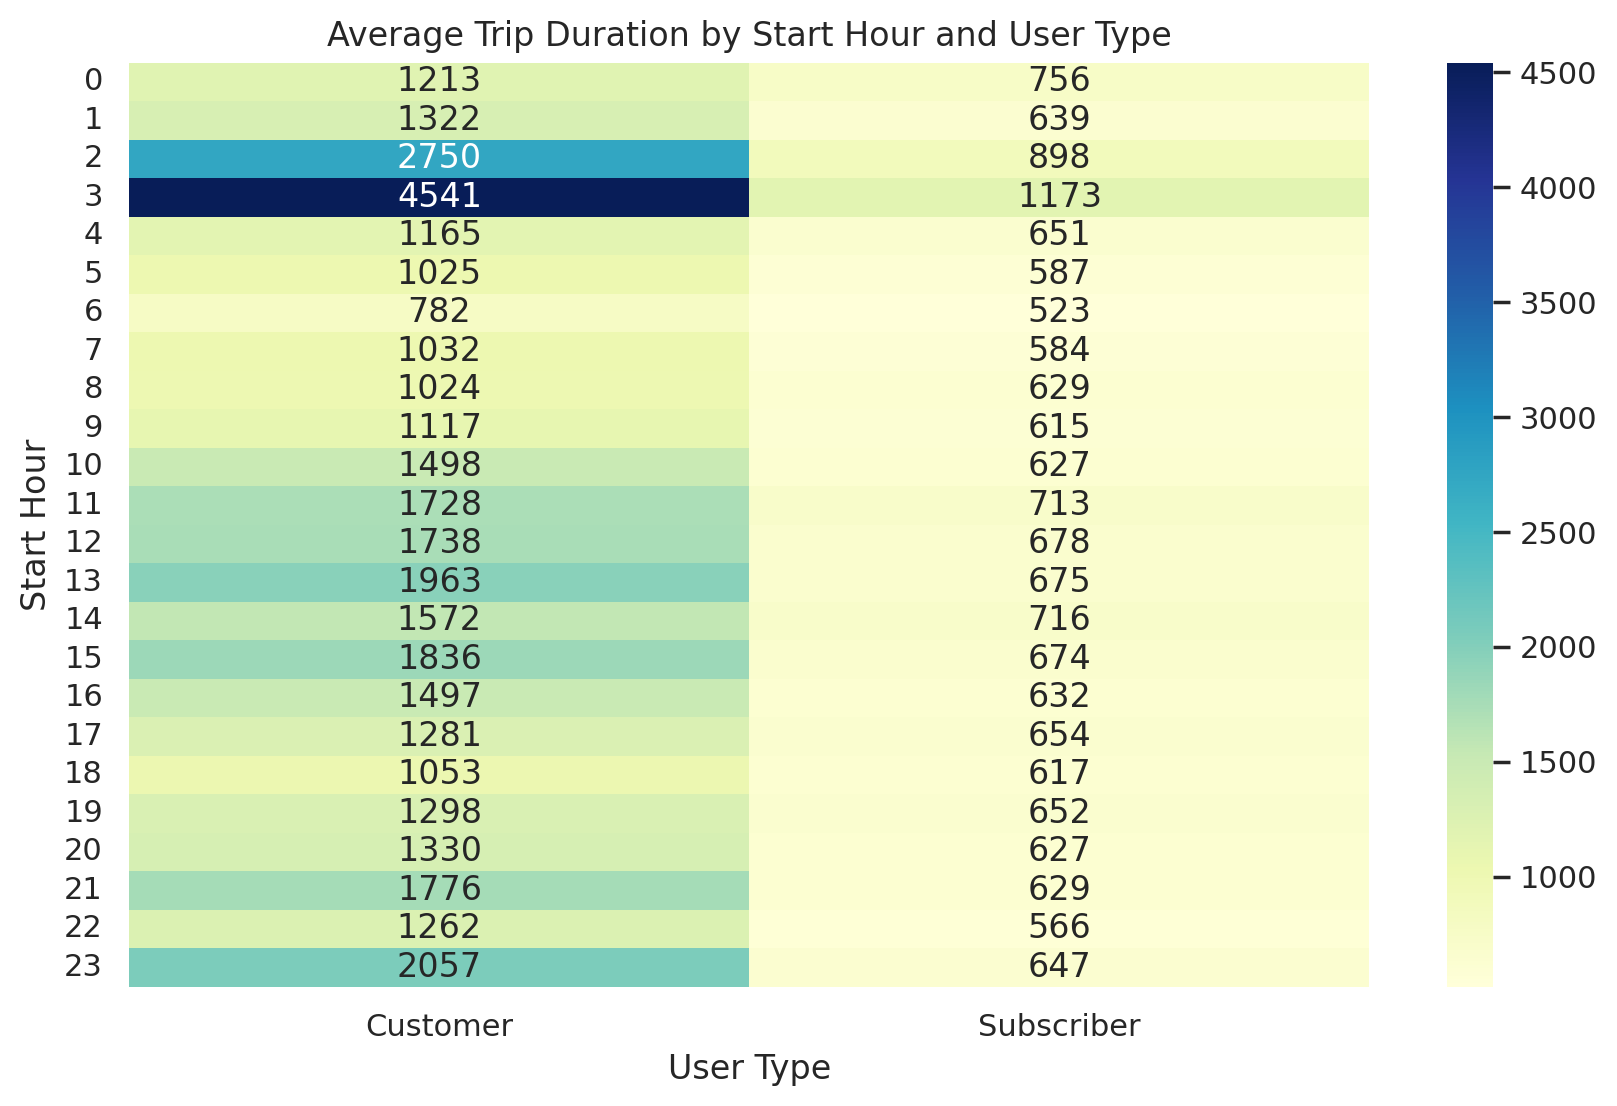

In [14]:
# Make sure start_hour exists
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour

# Compute pivot table for average duration
pivot_table = df.pivot_table(index='start_hour',
                             columns='user_type',
                             values='duration_sec',
                             aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Trip Duration by Start Hour and User Type')
plt.xlabel('User Type')
plt.ylabel('Start Hour')
plt.show()


**Observation:**  
The heatmap illustrates that customers tend to take longer rides, particularly around midday, which may reflect leisure or tourist activity. On the other hand, subscribers show shorter and more consistent trip durations, with modest increases during typical commute hours in the morning and late afternoon.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part of the analysis, examining the interaction between user type and gender offered deeper insight into trip duration trends. The facet plot revealed that customers—regardless of gender—tend to take longer rides, while subscribers consistently make shorter trips. This combination of variables reinforced the distinction between casual and routine usage patterns. Additionally, incorporating start hour into the analysis highlighted that subscriber activity peaks during standard commuting hours, further supporting the notion of work-related travel behavior.


### Were there any interesting or surprising interactions between features?

> Yes, the pairplot uncovered a notable interaction: subscriber activity spikes during the morning and evening commute periods, while customer usage is more evenly spread throughout the day. It also made clear that although both groups primarily take short trips, customers are significantly more likely to take longer rides at any hour. This multidimensional view offered clearer insights into behavioral differences than the bivariate plots alone.




## Conclusions

> This exploration revealed distinct patterns in how various user groups engage with the bike-sharing system. Subscribers tend to ride during weekday commute hours, reflecting consistent, work-related usage. On the other hand, customers show more flexible riding behavior, with longer trips spread throughout the day and week—suggesting recreational or occasional use. Analyzing user type alongside variables like gender and start hour strengthened these findings. Moving from single-variable analysis to multivariate exploration provided a more complete view of the factors influencing trip duration and overall usage trends.


> **Summary of Main Findings**:

* **Trip Duration**: The majority of rides are brief, though the data is right-skewed due to a few long trips. On average, customers take longer rides than subscribers.

* **User Type Behavior**: Subscribers tend to ride during weekday commuting hours, while customers are more active on weekends and throughout various times of the day.

* **Gender and Duration**: Across all gender categories, customers generally take longer trips, whereas subscribers exhibit more uniform trip lengths.

* **Effect of Start Hour**: While start hour doesn’t strongly affect trip duration, it does highlight peak commuting times for subscribers.

* **Multivariate Insights**: Analyzing user type alongside gender and start hour emphasized that subscribers primarily use the service for commuting, while customers tend to ride for more casual or recreational purposes.
